# 2장 - 머신러닝 프로젝트 처음부터 끝까지

이 장에서는 여러분이 부동산 회사에 막 고용된 데이터 과학자라고 가정하고 예제 프로젝트의 처음부터 끝까지 진행해보겠습니다\* 진행할 주요 단계는 다음과 같습니다.

1. 큰 그림을 봅니다.  
2. 데이터를 구합니다.
3. 데이터로부터 통찰을 얻기 위해 탐색하고 시각화합니다.
4. 머신러닝 알고리즘을 위해 데이터를 준비합니다.
5. 모델을 선택하고 모델을 훈련시킵니다.
6. 모델을 상세하게 조정합니다.
7. 솔루션을 제시합니다.
8. 시스템을 론칭하고 모니터링하고 유지 보수합니다.

---

\* 이 예제 프로젝트는 가상으로 만든 것입니다. 머신러닝의 주요 단계를 설명하는 것이 목적이며 부동산 비즈니스에 대해 배우려는 것은 아닙니다.


## 2.1 실제 데이터로 작업하기

머신러닝을 배울 때는 인공적으로 만들어진 데이터셋이 아닌 실제 데이터로 실행해보는 것이 가장 좋습니다. 다행히 여러 분야에 걸쳐 공개된 데이터셋이 아주 많습니다. 다음은 데이터를 구하기 좋은 곳입니다.

- 유명한 공개 데이터 저장소
    - UC 얼바인$^{Irvine}$ 머신러닝 저장소(http://archive.ics.uci.edu/ml)
    - 캐글$^{Kaggle}$ 데이터셋(http://www.kaggle.com/datasets)
    - 아마존 AWS 데이터셋(https://registry.opendata.aws)
- 메타 포털(공개 데이터 저장소가 나열되어 있습니다)
    - 데이터 포털$^{Data \ Portals}$(http://dataportals.org)
    - 오픈 데이터 모니터$^{Open \ Data \ Monitor}$(http://opendatamonitor.eu)
    - 퀀들$^{Quandl}$(http://quandl.com)
- 인기 있는 공개 데이터 저장소가 나열되어 있는 다른 페이지
    - 위키백과 머신러닝 데이터셋 목록(https://goo.gl/SJHN2k)
    - Quora.com(https://homl.info/10)
    - 데이터셋 서브레딧$^{subreddit}$(http://www.reddit.com/r/datasets)

이 장에서는 StatLib 저장소\*에 있는 캘리포니아 주택 가격$^{California \ Housing \ Proces}$ 데이터셋을 사용합니다. 이 데이터셋은 1990년 캘리포니아 인구조사 데이터를 기반으로 합니다. 최근 데이터는 아니지만(그 당시의 가격이라면 여러분도 베이 에어리어$^{Bay \ Area}$에 꽤 좋은 집을 살 수 있습니다) 학습용으로 아주 좋기 때문에 최근 데이터라고 생각하겠습니다. 교육 목적으로 사용하기 위해 범주형 특성을 추가하고 몇 개 특성을 제외했습니다.

---

\* 원본데이터는 켈리 페이스(R. Kelley Pace)와 로널드 배리(Ronald Barry)의「Sparse Spatial Autoregressions」, Statistics \& Probability Letterts 33, no.3 (1997): 291-297에 기술되어 있습니다. StatLib 저장소는 카네기 멜론(Carnegie Mellon) 대학교의 통계학과에서 운영하는 공개 데이텃셋 저장소입니다(http://lib.stat.cmu.edu/datasets/). 여기세서는 원본 데이터셋을 약간 수정한 버전을 사용합니다(https://goo.gl/QgRbUL).

## 2.2 큰 그림 보기

머신러닝 주택 회사에 오신 것을 환영합니다! 맨 처음 할 일은 캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것입니다. 이 데이터는 캘리포니아의 블록 그룹$^{block \ group}$마다 인구$^{population}$, 중간 소득$^{median \ income}$, 중간 주택 가격$^{median \ housing \ price}$ 등을 담고 있습니다. 블록 그룹은 미국 인구조사국에서 샘플 데이터를 발표하는 데 사용하는 최소한의 지리적 단위입니다(하나의 블록 그룹은 보통 600~3,000명의 인구를 나타냅니다). 여기서는 간단하게 구역이라고 부르겠습니다.

이 데이터로 모델을 학습시켜서 다른 측정 데이터가 주어졌을 때 구역의 중간 주택 가격을 예측해야 합니다.

<span style="color: #FFA500">TIP</span> 잘 훈련된 데이터 과학자로서 여러분이 첫 번째로 할 일은 머신러닝 프로젝트 체크리스트를 준비하는 것입니다. 부록 B에 준비한 것을 사용해도 됩니다. 대부분의 머신러닝 프로젝트에 잘 들어맞지만 필요에 따라 수정하는 것이 좋습니다. 이 장에서는 체크리스트에 있는 많은 항목을 다루겠지만 스스로 충분히 이해할 수 있는 항목이나 다음 장에서 논의할 항목은 건너뛰겠습니다.

### 2.2.1 문제 정의

상사에게 첫 번째로 할 질문은 "비즈니스의 목적이 정확히 무엇인가요?'입니다. 아마도 모델 만들기가 최종 목적은 아닐 것입니다. 회사에서는 이 모델을 어떻게 사용해 이익을 얻으려고 할까요? 목적을 아는 것은 문제를 어떻게 구성할지, 어떤 알고리즘을 선택할지, 모델 평가에 어떤 성능 지표를 사용하지, 모델 튜닝을 위해 얼마나 노력을 투여할지 결정하기 때문에 아주 중요합니다.

상사가 이 모델의 출력(구역의 중간 주택 가격에 대한 예측)이 여러 가지 다른 <span style="color: #008000">신호</span>$^{signal}$\*와 함께 다른 머신러닝 시스템에 입력으로 사용된다고 이야기합니다. 뒤따르는 시스템이 해당 지역에 투자할 가치가 있는지 결정합니다. 이 결정이 수익에 직결되기 때문에 올바르게 예측하는 것은 매우 중요합니다.

---

\* 머신러닝 시스템에 주입하는 정보를 클로드 섀넌(Claude Sgannon)의 정보 이론을 따라 종종'신호'라고 부릅니다. 그는 전기 통신 기술을 개선하기 위해 벨 연구소에서 이 이론을 개발했습니다. 그의 이론에 따르면 신호/잡음 비율이 높은 것이 좋습니다. 섀넌은 미국의 수학자이자 전기공학자로 디지털 회로 이론을 창시하였고 정보 이론의 아버지로 불립니다.

**파이프라인**

데이터 처리 <span style="color: #008000">컴포넌트</span>$^{component}$들이 연속되어 있는 것을 데이터 <span style="color: #008000">파이프라인</span>$^{pipeline}$이라고 합니다. 머신러닝 시스템은 데이터를 조작하고 변환할 일이 많아 파이프라인을 사용하는 일이 매우 흔합니다.

보통 컴포넌트들은 비동기적으로 동작합니다. 각 컴포넌트는 많은 데이터를 추출해 처리하고 그 결과를 다른 데이터 저장소로 보냅니다. 그러면 일정 시간 후 파이프라인의 다음 컴포넌트가 그 데이터를 추출해 자신의 출력 결과를 만듭니다. 각 컴포넌트는 완전히 독립적입니다. 즉, 컴포넌트 사이의 인터페이스는 데이터 저장소뿐입니다. 이는 (데이터 흐름도 덕분에) 시스템을 이해하기 쉽게 만들고, 각 팀은 각자의 컴포넌트에 집중할 수 있습니다 .한 컴포넌트가 다운되더라도 하위 컴포넌트는 문제가 생긴 컴포넌트의 마지막 출력을 사용해 (적어도 한동안은) 평상시와 같이 계속 동작할 수 있습니다. 그래서 시스템이 매우 견고해집니다.

한편 모니터링이 적절히 되지 않으면 고장 난 컴포넌트를 한동안 모를 수 있습니다. 데이터가 만들어진지 오래 되면 전체 시스템의 성능이 떨어집니다.

다음으로 상사에게 던질 질문은 '현재 솔루션은 어떻게 구성되어 있나요?'입니다(만약 있다면). 현재 상황은 문제 해결 방법에 대한 정보는 물론이고 참고 성능으로도 사용할 수 있습니다. 상사가 현재는 구역 주택 가격을 전문가가 수동으로 추정한다고 알려주었습니다. 한 팀이 구역에 관한 최신 정보를 모으고 있는데 중간 주택 가격을 얻을 수 없을 때는 복잡한 규칙을 사용하여 추정을 합니다.

이는 비용과 시간이 많이 들고 추정 결과도 썩 좋지 않습니다. 실제 중간 주택 가격을 구해보면 팀에서 추정한 것이 20% 이상 벗어났음을 알게 될 때가 많습니다. 이런 이유로 회사는 구역의 데이터를 기반으로 중간 주택 가격을 예측하는 모델을 훈련시키는 쪽이 유용하다고 생각합니다. 인구조사 데이터에는 다른 데이터는 물론 수천 개 구역의 중간 주택 가격을 포함하므로 이 작업에 매우 적합한 데이터셋으로 보입니다.

이제 이런 정보들을 가지고 시스템을 설계할 준비가 되었습니다. 먼저 문제를 정의해야 합니다. 이는 지도 학습, 비지도 학습, 강화 학습 중 무엇일까요? 분류나 회귀인가요 아니면 다른 어떤 작업인가요? 배치 학습과 온라인 학습 중 어느 것을 사용해야 하나요? 이 책을 계속 읽어나가기 전에 잠시 멈추고 이 질문들의 답을 찾아보세요.

답을 찾았나요? 같이 한번 보겠습니다. <span style="color: #008000">레이블</span>된 훈련 샘플이 있으니 (각 샘플이 기대 출력값, 즉 구역의 중간 주택 가격을 가지고 있습니다) 이는 전형적인 지도 학습 작업입니다. 또한 값을 예측해야 하므로 전형적인 회귀 문제입니다. 좀 더 구체적으로는 예측에 사용할 특성이 여러 개(구역의 인구, 중간 소득 등)이므로 <span style="color: #008000">다중 회귀</span>$^{multiple \ regression}$ 문제입니다. 또한 각 구역마다 하나의 값을 예측하므로 <span style="color: #008000">다변량 회귀</span>$^{univariate \ regression}$ 문제 입니다. 구역마다 여러 값을 예측한다면 <span style="color: #008000">다변량 회귀</span>$^{multivariate \ regression}$ 문제입니다. 마지막으로 이 시스템으로 들어오는 데이터에 연속적인 흐름이 없으므로 빠르게 변하는 데이터에 적응하지 않아도 되고, 데이터가 메모리에 들어갈 만큼 충분히 작으므로 일반적인 배치 학습이 적절합니다.

<span style="color: #FFA500">TIP</span> 데이터가 매우 크면(<span style="color: #008000">맵리듀스</span>$^{MapReduce}$\* 기술을 사용하여) 배치 학습을 여러 서버로 분할하거나, 대신 온라인 학습 기법을 사용할 수 있습니다.

---

\* 맵리듀스가 구현된 대표적인 프레임워크는 아파치 하둡(Hadoop) 프로젝트입니다(http://hadoop.apache.org). 하둡을 사용하여 직접 회귀 분석을 구현할 수 있지만 일반적으로 맵리듀스에서는 스파크(Spark)의 MLlib(https://spark.apache.org/mllib) 을 사용하는 것이 편리하고 성능도 뛰어납니다.

### 2.2.2 성능 측정 지표 선택

다음 단계는 성능 측정 지표를 선택하는 것입니다. 회귀 문제의 전형적인 성능 지표는 <span style="color: #008000">평균 제곱근 오차</span>$^{root \ mean \ square \ error}$(RMSE)입니다. 오차가 커질수록 이 값은 더욱 커지므로 예측에 얼마나 많은 오류가 있는지 가늠하게 해줍니다. 아래 식은 RMSE를 계산하는 공식입니다.

$$ RMSE(X, h) = \sqrt{\frac{1}{m} \sum_{i=1}^m (h(x^{(i)}) － y^{(i)})^2 } $$

**표기법**

위 식에서 이 책 전체에 걸쳐 사용할 대표적인 머신러닝 분야의 표기법 몇 가지를 볼 수 있습니다.

- $m$은 RMSE를 측정할 데이터셋에 있는 샘플 수입니다.  
    예를 들어 2,000개 구역의 검증 세트에 대해 RMSE를 평가한다면 $m=2,000$입니다.
- $x^{(i)}$는 데이터셋에 있는 $i$번째 샘플(레이블은 제외한)의 전체 특성값의 벡터이고, $y^{(i)}$는 해당 레이블(해당 샘플의 기대 출력값)입니다.  
    예를 들어 데이터셋에 있는 첫 번째 구역이 경도 -118.29˚, 위도 33.91˚에 위치하고, 중간 소득이 ＄38,372이며, 주민이 1,416명, 중간 주택 가격이 ＄156,400라면 $x^{(i)}$과 $y^{(i)}$은 다음과 같습니다(여기서 다른 특성은 고려하지 않았습니다).
    
$$ x^{(1)} = \left( \begin{array}{cc} \ －118.29 \ \\ \ 33.91 \ \\ \ 1,416 \ \\ \ 38.372 \ \\ \end{array} \right) $$
$$ \\ $$

$$ y^{(1)} = 156,400 $$

- $X$는 데이터셋에 있는 모든 샘플의 모든 특성값(레이블은 제외)을 포함하는 행렬입니다. 샘플 하나가 하나의 행이어서 $i$번째 행은 $X^{(i)}$의 전치\*와 같고 $(X^{(i)})^T$ 으로 표기합니다.  
    예를 들어 첫 번째 구역이 앞의 예와 같아면 행렬 $X$는 다음과 같습니다.
    
$$ X = \left( \begin{array}{cc} \ (x^{(1)})^T \ \\ \ (x^{(2)})^T \ \\ \ \vdots \ \\ \ (x^{(1999)})^T \ \\ \ (x^{(2000)})^T \ \\ \end{array} \right) = \left( \begin{array}{cc} \ －118.29　 \ 33.91　 \ 1,416　 \ 38,372　 \ \\ \ \vdots　　　 \ \vdots　　　 \ \vdots　　　 \ \vdots　　　 \ \\ \end{array} 　 \right) $$

- $h$는 시스템의 예측 함수며 <span style="color: #008000">가설</span>$^{hypothesis}$이라고도 합니다. 시스템이 하나의 샘플 특성 벡터 $x^{(i)}$를 받으면 그 샘플에 대한 예측값 $\hat{y}^{(i)}=h(x^{(i)})$를 출력합니다($\hat{y}$은 'y-햇'이라고 읽습니다).  
    예를 들어 시스템이 첫 번째 구역의 중간 주택 가격을 ＄158,400이라고 예측한다면 $\hat{y}^{(i)}=h(x^{(i)})$ = 158,400입니다. 이 구역에 대한 예측 오차는 $ \hat{y}^{(1)} － y^{(1)} = 2,000 $입니다.

- RMSE($X$, $h$)는 가설 $h$를 사용하여 일련의 샘플을 평가하는 비용 함수입니다.

스칼라 값이나 함수를 나타낼 때는 $m$이나 $y^{(i)}$ 또는 $h$와 같이 이탤릭체 소문자, 벡터를 나타낼 때는 $x^{(i)}$와 같이 굵은 소문자, 행렬을 나타낼 때는 $X$와 같이 굵은 대문자를 사용하겠습니다.
    
---
\* 전치는 열 벡터를 행 벡터로(그리고 반대로도) 바꿉니다.

RMSE가 일반적으로 회귀 문제에 선호되는 성능 측정 방법이지만 경우에 따라 다른 함수를 사용할 수도 있습니다. 예를 들어 이상치로 보이는 구역이 많다고 가정합시다. 이런 경우에는 <span style="color: #008000">평균 절대 오차</span>$^{mean \ absolute \ error}$(평균 절대 편차$^{mean \ absolute \ deviation}$라고도 합니다)를 고려해볼 수 있습니다. 아래 식을 참조하세요.

$$ MAE(X, h) = \frac{1}{m} \sum_{i=1}^m |h(x^{(i)}－y^{(i)}| $$

RMSE와 MAE 모두 예측값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법입니다. 거리 측정에는 여러 가지 방법(또는 <span style="color: #008000">노름</span>$^{norm}$)이 가능합니다.

- 제곱항을 합한 것의 제곱근(RMSE) 계산은 <span style="color: #008000">유클리디안 노름</span>$^{Euclidean \ norm}$에 해당합니다. 우리와 친숙한 거리 개념입니다. 또는 $\ell_2$ 노름이하고도 부르며 ||$·$||$_2$ (또는 그냥 ||$·$||)로 표시합니다.

- 절댓값의 합을 계산하는 것은 $\ell_1$ 노름에 해당하며 ||$·$||$_1$로 표기합니다. 이는 도시의 구획이 직각으로 나뉘어 있을 때 이 도시의 두 지점 사이의 거리를 측정하는 것과 같아 <span style="color: #008000">맨해튼 노름</span>$^{Manhattan \ norm}$이라고도 합니다.

- 일반적으로 원소가 $n$개인 벡터 **v**의 $\ell_k$ 노름은 ||**V**||$_k$ = $ \left( |v_0|^k ＋ |v_1|^k ＋···＋|v_n|^k \right) \ ^\frac{1}{k} $으로 정의합니다. $\ell_0$은 단순히 벡터에 있는 0이 아닌 원수의 수이고, $\ell_{\infty}$는 벡터에서 가장 큰 절댓값이 됩니다.
- 노름의 지수가 클수록 큰 값의 원소에 치우치며 작은 값은 무시됩니다. 그래서 RMSE가 MAE보다 조금 더 이상치에 민감합니다. 하지만 (종 모양의 분포의 양 끝단처럼) 이상치가 매우 드물면 RMSE가 잘 맞아 일반적으로 널리 사용됩니다.

### 2.2.3 가정 검사

마지막으로 (여러분과 동료들이) 지금까지 만든 가정을 나열하고 검사해보는 것이 좋습니다. 이 과정에서 심각한 문제를 일찍 발견할 수도 있습니다. 예를 들어 시스템이 출력한 구역의 가격이 다음 머신러닝 시스템의 입력으로 들어가게 되는데 이 값이 있는 그대로 사용될 거라 가정했습니다. 하지만 하위 시스템에서 이 값을 ('저렴', '보통', '고가' 같은) 카테고리로 바꾸고 가격 대신 카테고리를 사용하면 어떻게 될까요? 이럴 때는 정확한 가격을 구하는 것이 전혀 중요하지 않습니다. 올바른 카테고리를 구하는 시스템이 필요합니다. 그렇다면 이제 이 문제는 회귀가 아니라 분류 작업이 됩니다. 몇 달 동안 회귀 시스템을 구축하고 나서야 이런 사실을 깨닫게 되는 것을 아무도 원치 않을 것입니다.

다행히도 하위 시스템을 담당하는 팀과 대화 후 그들이 카테고리가 아니라 실제 가격을 사용한다는 것을 확인했습니다. 훌륭합니다! 모든 것이 준비 되었고 출발선에 섰습니다. 이제 코딩을 시작할 수 있습니다!

## 2.3 데이터 가져오기

이제 직접 키보드를 두드릴 차례입니다. 주피터 노트북에 있는 다음 코드 예제를 따라 해보세요. 전체 주피터 노트북은 https://github.com./rickiepark/handson-ml2 \* 에 있습니다.

----
\* 이 주소는 옮긴이의 저장소입니다. 저자의 저장소는 https://github.com/ageron/handson-ml2 입니다.

### 2.3.2 데이터 다운로드

일반적으로 여러분이 다룰 데이터는 관계형 데이터베이스(또는 다른 데이터 저장소)에 들어있고 여러 테이블, 문서, 파일로 나뉘어 있을 것입니다. 이런 데이터에 접근하려면 먼저 보안 자격과 접근 권한이 있어야 하고\* 그 데이터의 구조를 잘 알고 있어야 합니다. 하지만 이 프로젝트는 간단합니다. 모든 데이터가 들어 있는 CSV$^{comma-separated \ value}$ 파일인 `housing.csv` 를 압축한 `housing.tgz` 파일을 내려받기만 하면 됩니다.

웹 브라우저를 사용해 이 파일을 내려 받고 `tar xzf housing.tgz` 명령을 실행해서 압축을 출어 CSV 파일을 얻을 수 있지만, 간단한 함수를 만들어 사용하면 더 편합니다. 데이터를 다운로드하는 함수를 준비하면 특히 데이터가 정기적으로 바뀌는 경우에 유용합니다. 최근 데이터를 받기 위해 이 함수를 사용하는 짧은 스크립트를 작성할 수 있습니다(또는 스케줄링하여 주기적으로 자동 실행할 수도 있습니다). 데이터를 내려받는 일을 자동화하면 여러 기기에 데이터셋을 설치해야 할 때도 편리합니다.

다음 코드가 데이터를 추출하는 함수입니다.\**

---

\* 또한 개인 정보가 담긴 필드가 안전하지 않은 저장소로 복사되지 않는 등의 법적 제약도 검토해야 합니다.  
\** 실제 프로젝트에서는 이 코드를 파이썬 파일에 저장하지만 여기서는 그냥 주피터 노트북에 작성합니다.

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

`fetch_housing_data()` 를 호출하면 현재 작업공간에 `datasets/housing` 디렉토리를 만들고 `housing.tgz` 파일을 내려받고 같은 디렉터리에 압축을 풀어 `housing.csv` 파일을 만듭니다.

이제 판다스를 사용하여 데이터를 읽어 들이겠습니다. 데이터를 읽어 들이는 간단한 함수도 하나 만듭니다.

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

이 함수는 모든 데이터를 담은 판다스의 데이터프레임 객체를 반환합니다.

### 2.3.3 데이터 구조 훑어보기


DataFrame의 `head()` 메서드를 사용해 처음 다섯 행을 확인해보겠습니다.

In [4]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

각 행은 하나의 구역을 나타냅니다. 특성은 `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`, `ocean_proximity` 등 10개 입니다.

info() 메서드는 데이터에 대한 간략한 설명과 특히 전체 행의 수, 각 특성의 데이터 타입과 널$^{null}$이 아닌 값의 개수를 확인하는 데 유용합니다.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


데이터셋에 20,640개의 샘플이 들어 있습니다. 머신러닝 프로젝트치고는 상당히 작은 편이지만, 처음 시작하기에는 적당한 크기입니다. `total_bedrooms` 특성은 20,433개만 널 값이 아닙니다. 207개의 구역은 이 특성을 가지고 있지 않다는 것을 뜻합니다. 나중에 이 문제를 적절히 처리하겠습니다.

`ocean_proximity` 필드만 빼고 모든 특성이 숫자형입니다. `ocean_proximity` 필드의 데이터 타입이 `object`이므로 어떤 파이썬 객체도 될 수 있지만, 데이터를 CSV 파일에서 읽어 들였기 때문에 텍스트 특성일 것입니다. 처음 다섯 행을 출력했을 때 `ocean_proximity` 열의 값이 반복되는 것으로 보아서\* 이 특성은 아마도 범주형$^{categorical}$일 것입니다. 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 `value_counts()` 메서드로 확인합니다.

---

\* 위에는 모든 열이 나타나 있지 않고 깃허브 주피터 노트북에서 전체 열을 확인할 수 있습니다. 처음 다섯 행의 ocean_proximity는 모두 'NEAR BAY'입니다.

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

다른 필드도 살펴보겠습니다. `describe()` 메서드는 숫자형 특성의 요약 정보를 보여줍니다.

In [7]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

count, mean, min, max 행이 의미하는 바는 쉽게 알 수 있습니다. 널 값이 제외된 것을 볼 수 있습니다(예를 들어 `total_bedrooms`의 `count`는 20,640이 아니고 20,433입니다). std 행은 값이 퍼져 있는 정도를 측정하는 표준편차를 나타냅니다.\* 25%, 50%, 75% 행은 <span style="color: #008000">백분위수</span>$^{percentile}$를 나타냅니다. 백분위수는 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값을 나타냅니다. 예를 들어 25%의 구역은 `housing_median_age`가 18보다 작고, 50%는 29보다 작고, 75%는 37보다 작습니다. 이를 25번째 백분위수(또는 제1<span style="color: #008000">사분위수</span>$^{quartile}$), 중간값, 75번째 백분위수(또는 제3사분위수)라고도 합니다.

데이터의 형태를 빠르게 검토하는 다른 방법은 각 숫자형 특성을 히스토그램으로 그려보는 것입니다. 히스토그램은 주어진 값의 범위(수평축)에 속한 샘플 수(수직축)를 나타냅니다. 특성마다 따로 히스토그램을 그릴 수도 있고 (다음 코드 예제처럼) 전체 데이터셋에 대해 `hist()` 메서드를 호출하면 모든 숫자형 특성에 대한 히스토그램을 출력합니다.

---

\* 표준편차는 일반적으로 $\sigma$(18번째 그리스 문자인 시그마)로 표시합니다. 이 값은 평균에서부터 떨어진 거리를 제곱하여 평균한 분산(variance)의 제곱근입니다. 어떤 특성이 정규분포(normal distribution, 또는 가우시안 분포(Gaussian distribution)라고도 부릅니다)를 따르는 경우 '68-95-99.7' 규칙이 적용되는 경우가 많습니다. 약 68%의 값은 1$\sigma$ 안에, 95%는 2$\sigma$ 안에, 99.7%는 3$\sigma$ 안에 있다는 뜻입니다.

<span style="color: #008000">NOTE_</span> `hist()` 메서드는 맷플롭립을 사용하고 결국 화면에 그래프를 그리기 위해 사용자 컴퓨터의 그래픽 백엔드를 필요로 합니다. 그래서 그래프를 그리기 전에 맷플로립이 사용할 백엔드를 지정해줘야 합니다. 주피터의 매직 명령 `％matplotlib inline`을 사용하면 편리합니다. 이 명령은 맷플롯립이 주피터 자체의 백엔드를 사용하도록 설정합니다. 그러면 그래프는 노트북 안에 그려지게 됩니다.\* 주피터 노트북에서 그래프를 그릴 때 `show()` 메서드를 호출하는 것은 선택 사항입니다. 주피터는 셀이 실행될 때 자동으로 그래프를 그려줍니다.

---

\* IPython kernel 4.4.0부터는 \%marplotlib inline 매직 명령을 사용하지 않더라도 맷플롯립 1.5 이상에서는 자동으로 주피터 자체 백엔드로 설정됩니다.

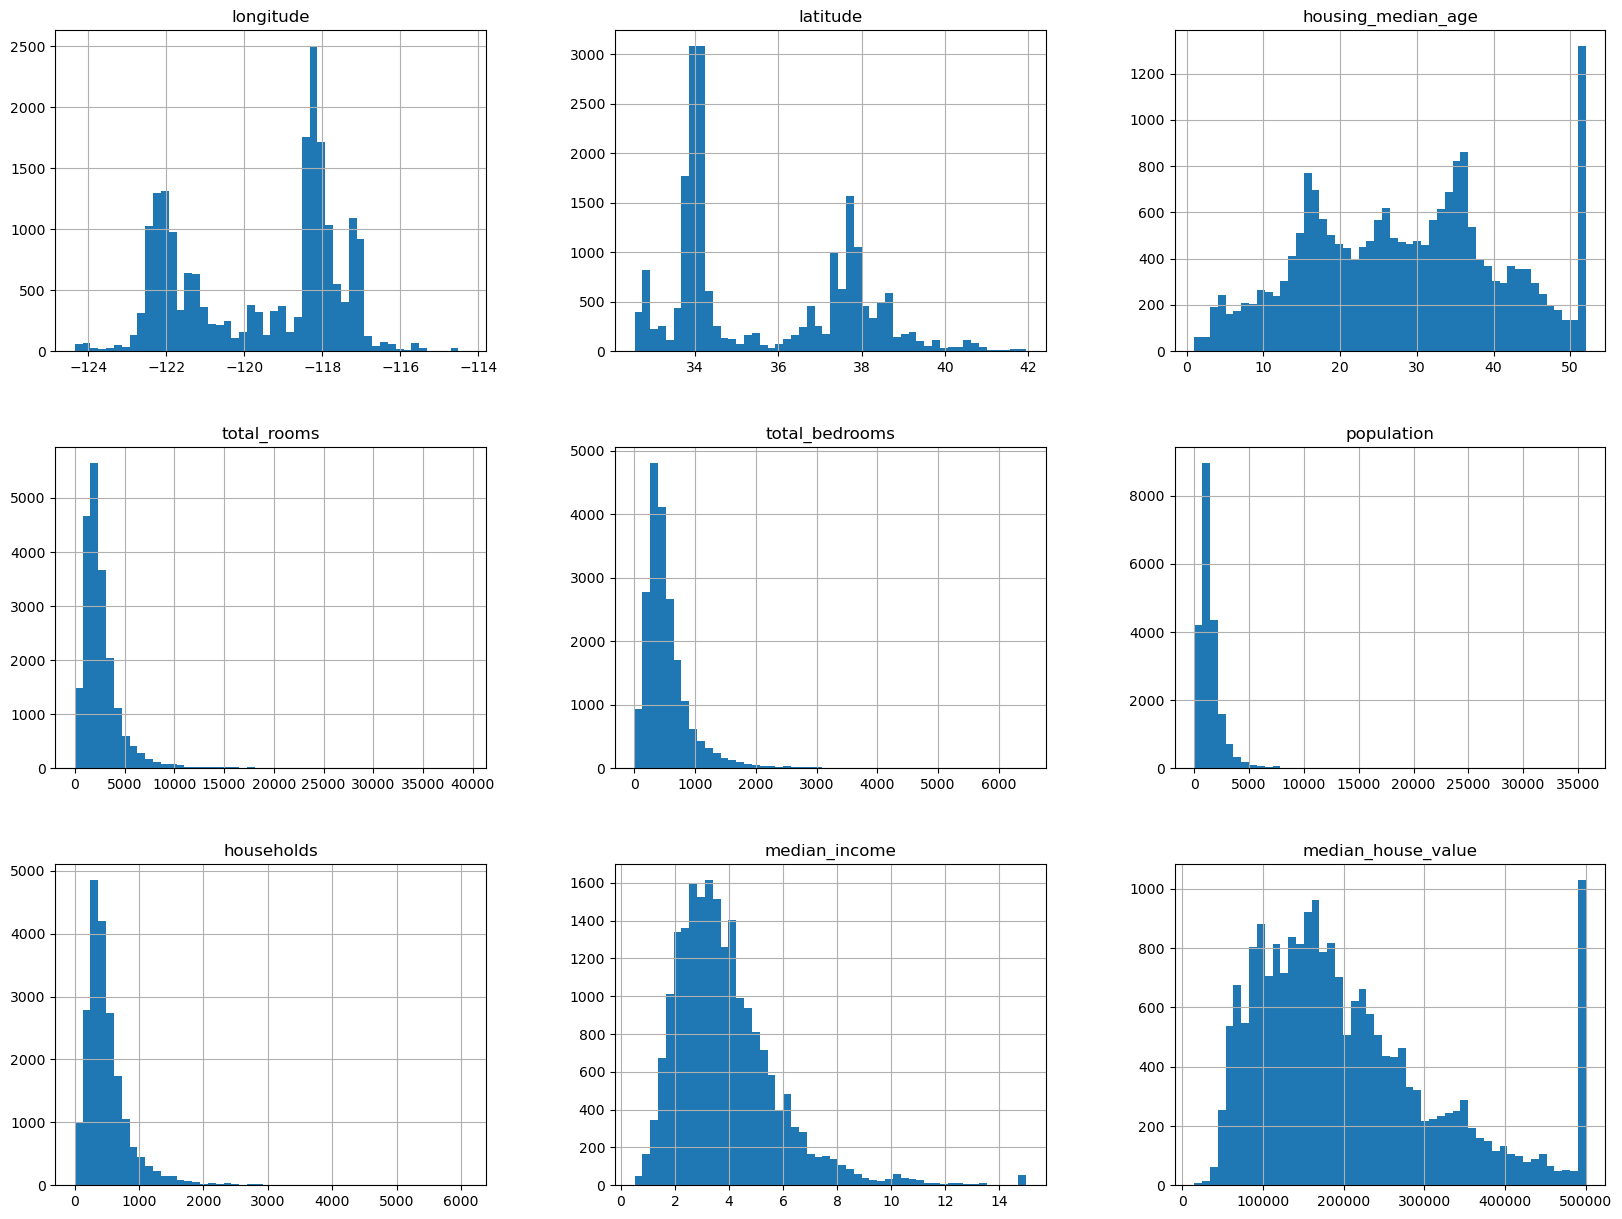

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

이 히스토그램에서 몇 가지 사항을 확인할 수 있습니다.

1. 먼저 중간 소득$^{median \ income}$특성이 US 달러로 표현되어 있지 않은 것 같습니다.\* 데이터를 취합한 팀에 확인해보니 스케일을 조정하고, 상한이 15(실제로는 15.0001), 하한이 0.5(실제로는 0.4999)가 되도록 만들었다고 합니다. 대략 수만 달러를 나타냅니다(예를 들어 3은 실제로 약 30,000달러를 의미합니다). 머신러닝에서는 전처리된 데이터를 다루는 경우가 흔하고 이것이 문제가 되지는 않지만 데이터가 어떻게 계산된 것인지 반드시 이해하고 있어야 합니다.
    
2. 중간 주택 연도$^{housing \ median \ age}$와 중간 주택 가격$^{median \ house \ value}$ 역시 최댓값과 최솟값을 한정했습니다.\** 중간 주택 가격의 경우는 타깃 속성(레이블)으로 사용되기 때문에 심각한 문제가 될 수 있습니다. 가격이 한곗값을 넘어가지 않도록 머신러닝 알고리즘이 학습될지도 모릅니다. 이것이 문제가 될지 안 될지는 클라이언트 팀(이 시스템의 출력을 사용할 팀)과 함께 검토하는 것이 좋습니다. 만약 그팀에서 ＄500,000를 넘어가더라도 정확한 예측값이 필요하다고 한다면 우리가 선택할 수 있는 방법은 두 가지입니다.

    a. 한곗값 밖의 구역에 대한 정확한 레이블을 구합니다.  
    b. 훈련 세트에서 이런 구역을 제거합니다(＄50,000가 넘는 값에 대한 예측은 평가 결과가 매우 나쁠 것이므로 테스트 세트에서도 제거합니다.).

3. 특성들의 스케일이 서로 많이 다릅니다. 특성 스케일링에 대해서는 이 장의 뒷부분에서 살펴보겠습니다.

4. 마지막으로 많은 히스토그램의 꼬리가 두껍습니다. 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있습니다. 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만듭니다. 나중에 이런 특성들을 좀 더 종 모양의 분포가 되도록 변형시키겠습니다.

이제 앞으로 다룰 데이터를 잘 이해했을 것입니다.

<span style="color: #FFA500">CAUTION_</span>데이터를 더 깊게 들여다보기 전에 테스트 세트를 따로 떼어놓아야 합니다. 그리고 테스트 세트를 절대 들여다보면 안됩니다.

### 2.3.4 테스트 세트 만들기

이 단계에서 데이터 일부를 자진해서 떼어놓으라는 것이 이상하게 들릴지 모르겠습니다. 지금까지 데이터를 잠시 살펴봤을 뿐이고 어떤 알고리즘을 사용할지 정하기 전에 전체 데이터를 자세히 파악해야 하지 않을까요? 사실 맞습니다. 하지만 우리 뇌의 매우 과대적합되기 쉬운 엄청난 패턴 감지 시스템입니다. 만약 테스트 세트를 들여다본다면 테스트 세트에서 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모릅니다. 이 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않을 것입니다. 이를 <span style="color: #008000">데이터 스누핑</span>$^{data \ snooping}$ 편향이라고 합니다.

테스트 세트를 생성하는 일은 이론적으로 간단합니다. 무작위로 어떤 샘플을 선택해서 데이터셋의 20% 정도를(또는 데이터셋이 매우 크다면 그보다 적게) 떼어놓으면 됩니다.

In [9]:
import numpy as np

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 예시로 만든 것입니다. 실전에서는 사이킷런의 train_test_split()를 사용하세요.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

이 함수를 다음과 같이 사용할 수 있습니다. \*

---

\* 이 책에서는 여기에서와 같이 코드 예제가 코드와 출력을 포함할 때 가독성을 위해 파이썬 인터프리터와 같은 형식을 사용합니다. 코드는 앞에 ＞＞＞가(또는 들여 쓴 문장에서는 ．．．가) 붙습니다. 출력은 앞에 아무것도 붙지 않습니다.

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [11]:
len(test_set)

4128

좋네요. 이것도 괜찮지만 완벽하지는 않습니다. 프로그램을 다시 실행하면 다른 테스트 세트가 생성됩니다! 여러 번 계속하면 우리는(또는 우리 머신러닝 알고리즘이) 전체 데이터셋을 보는 셈이므로 이런 상황은 피해야합니다.

한 가지 해결책은 처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러들이는 것입니다. 또 다른 방법은 항상 같은 난수 인덱스가 생성되도록 `np.random.permutaion()` 을 호출하기 전에 난수 발생기의 초깃값을 지정하는 것입니다(예를 들면 `np.random.seed(42)`\*).

하지만 이 두 해법 모두 다음번에 업데이트된 데이터셋을 사용하려면 문제가 됩니다. 데이터셋을 업데이트한 후에도 안정적인 훈련／테스트 분할을 위한 일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것입니다(샘플이 고유하고 변경 불가능한 식별자를 가지고 있다고 가정합니다). 예를 들어 각 샘플마다 식별자의 해시값을 계산하여 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트 세트로 보낼 수 있습니다. 이렇게 하면 여러 번 반복 실행되면서 데이터셋이 갱신되더라도 테스트 세트가 동일하게 유지됩니다. 새로운 테스트 세트는 새 샘플의 20%를 갖게 되지만 이전에 훈련 세트에 있던 샘플은 포함시키지 않을 것입니다.

다음은 이를 구현한 코드입니다.\**

---

\* 사람들은 난수 초깃값으로 42를 자주 사용합니다. 이 숫자는 '삶, 우주, 그리고 모든 것에 대한 궁극적인 질문의 해답'인 것 외에는 특별한 의미는 없습니다. 이 숫자는 더글러스 애덤스(Douglas Adams)의 소설 「은하수를 여행하는 히치하이커를 위한 안내서」에서 슈퍼컴퓨터인 깊은 생각(Deep Thought)이 이 질문에 대해 750만 년 동안 계산하여 내놓은 답입니다.

\** crc32() 함수의 결과에 비트 연산을 하는 이유는 파이썬 2와 호환성을 유지하기 위해서입니다.

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

안타깝게도 주택 데이터셋에는 식별자 컬럼이 없습니다. 대신 행의 인덱스를 ID로 사용하면 간단히 해결됩니다.

In [13]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

행의 인덱스를 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되어야 하고 어떤 행도 삭제되지 않아야 합니다. 이것이 불가능할 땐 고유 식별자를 만드는 데 안전한 특성을 사용해야 합니다. 예를 들어 구역의 위도와 경도는 몇백 년 후까지 안정적이라고 보장할 수 있으므로 두 값을 연결하여 다음과 같이 ID를 만들 수 있습니다.\*

---

\* 위치 정보는 사실 정밀도가 낮아 여러 구역의 ID가 동일해지므로 같은 테스트 세트 혹은 훈련 세트에 들어가게 됩니다. 이는 원치 않은 샘플링 편향을 만듭니다.

In [14]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [15]:
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
59     59    -122.29     37.82                 2.0        158.0   
60     60    -122.29     37.83                52.0       1121.0   
61     61    -122.29     37.82                49.0        135.0   
62     62    -122.29     37.81                50.0        760.0   
67     67    -122.29     37.80                52.0       1027.0   

    total_bedrooms  population  households  median_income  median_house_value  \
59            43.0        94.0        57.0         2.5625             60000.0   
60           211.0       554.0       187.0         3.3929             75700.0   
61            29.0        86.0        23.0         6.1183             75000.0   
62           190.0       377.0       122.0         0.9011             86100.0   
67           244.0       492.0       147.0         2.6094             81300.0   

   ocean_proximity         id  
59        NEAR BAY -122252.18  
60        NEAR BAY -122252.17  
61        NEAR BAY -122252.18  
62        NEAR BAY -122252.19  
67        NEAR BAY -122252.20

사이킷런은 데이터셋을 여러 서브셋으로 나누는 다양한 방법을 제공합니다. 가장 간단한 함수는 `train_test_split`으로, `split_train_test`와 아주 비슷하지만 두 가지 특징이 더 있습니다. 첫째, 앞서 설명한 난수 초깃값을 지정할 수 있는 `random_state`매개변수가 있고, 둘째, 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있습니다(이는 예를 들어 데이터프레임이 레이블에 따라 여러 개로 나뉘어 있을 때 매우 유용합니다.)\*

---

\* train_test_split() 함수는 파이썬 리스트, 넘파이 배열, 판다스 데이터프레임과 판다스 시리즈(Series) 객체 등을 입력으로 받을 수 있습니다.

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

지금까지는 순수한 무작위 샘플링 방식을 보았습니다. 데이터셋이 충분히 크다면(특히 특성 수에 비해) 일반적으로 괜찮지만, 그렇지 않다면 샘플링 편향이 생길 가능성이 큽니다. 설문조사 기관에서 1,000명에게 질문 몇 개를 하려 할 때 그냥 전화번호부에서 1,000명을 무작위로 뽑는 것이 아닙니다. 전체 인구를 대표할 수 있는 1,000명을 선택하기 위해 노력합니다. 미국 인구의 51.3％가 여성이고 48.7％가 남성이라면, 잘 구성된 설문조사는 샘플에서도 이 비율을 유지해야 합니다. 즉, 여성은 513명, 남성은 487명이어야 합니다. 이를 <span style="color: #008000">계층적 샘플링</span>$^{stratified \ sampling}$이라고 합니다. 전체 인구는 <span style="color: #008000">계층</span>$^{strata}$이라는 동질의 그룹으로 나뉘고, 테스트 세트가 전체 인구를 대표하도록 각 계층에서 올바른 수의 샘플을 추출합니다. 완전한 무작위 샘플링을 사용하여 설문을 진행하면 49％보다 적거나 54％보다 많은 여성이 테스트 세트에 들어갈 확률이 약 12％입니다.\* 어느 방법을 사용하든 설문조사 결과를 크게 편향시키게 됩니다.

전문가가 중간 소득이 중간 주택 가격을 예측하는 데 매우 중요하다고 이야기해주었다고 가정합시다. 이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야합니다. 중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 합니다. 중간 소득의 히스토그램을 조금 더 자세히 살펴보겠습니다. 중간 소득 대부분은 1.5에서 6(즉 ＄15,000∼＄60,000) 사이에 모여 있지만 일부는 ＄60,000를 넘기도 합니다. 계층별로 데이터셋에 충분한 샘플 수가 있어야 합니다. 그렇지 않으면 계층의 중요도를 추정하는데 편향이 발생할 것입니다. 이 말은 너무 많은 계층으로 나누면 안 된다는 뜻이고 각 계층이 충분히 커야 한다는 것입니다. 다음 코드는 `pd.cut()` 함수를 사용해 카테고리 5개를 가진 소득 카테고리 특성을 만듭니다(1에서 5까지 레이블을 가집니다). 카테고리 1은 0에서 1.5까지 범위(즉 ＄15,000 이하)이고 카테고리 2는 1.5에서 3까지 범위가 되는 식입니다.

---

\* 샘플 수가 $n$이고 모집단에서의 비율이 $p$일 때 $n × p ≥ 10$이고 $n × (1 － p) ≥ 10$인 이항 분포는 평균이 $np$고 표준편차가 $\sqrt{np(1－p)} \ $인 정규분포로 근사할 수 있습니다. 따라서 전체 인구 중 51.3％인 여성이 샘플에서 차지할 비율의 분포는 평균이 $1000 × 0.513 = 513$이고 표준편차가 $\sqrt{1000 × 0.513 × (1 － 0.513)} = 15.8$입니다. 평균이 513이고 표준편차가 15.8인 정규분포에서 490이하와 540이상인 부분의 면적은 약 11.65％입니다.

<Axes: >

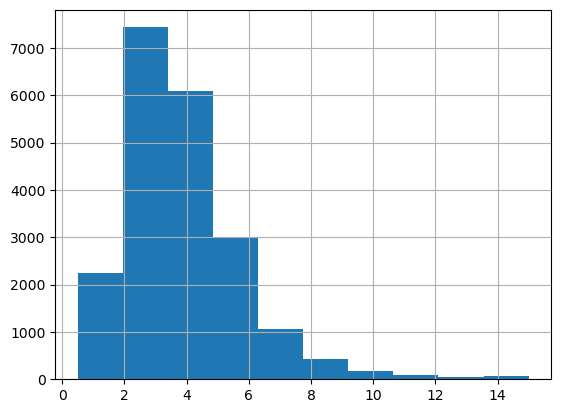

In [18]:
housing["median_income"].hist()

In [19]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [20]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

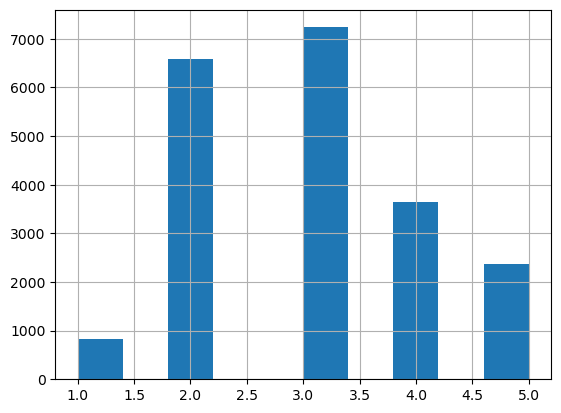

In [21]:
housing["income_cat"].hist()

이제 소득 카테고리를 기반으로 계층 샘플링을 할 준비가 되었습니다. 사이킷런의 `StratifiedShuffleSplit` 를 사용할 수 있습니다.\*

---

\* `StratifiedShuffleSplit`는 `StratifiedKFold`의 계층 샘플링과 `ShuffleSplit`의 랜덤 샘플링을 합친 것으로 `test_size`와 `train_size`매개변수의 합을 1 이하로 지정할 수도 있습니다.

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

의도대로 되었는지 살펴보겠습니다. 테스트 세트에서 소득 카테고리의 비율을 먼저 살펴보겠습니다.

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [24]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

비슷한 코드로 전체 데이터셋에 있는 소득 카테고리의 비율을 측정합니다. 아래는 전체 데이터셋과 계층 샘플링으로 만든 테스트 세트에서 소득 카테고리 비율을 비교한 것입니다. 그림에서 보듯이 계층 샘플링을 사용해 만든 테스트 세트가 전체 데이터셋에 있는 소득 카테고리의 비율과 거의 같습니다. 반면 일반 무작위 샘플링으로 만든 테스트 세트는 비율이 많이 달라졌습니다.

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [26]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039971  0.040213      0.973236       0.364964
2  0.318847    0.318798  0.324370      1.732260      -0.015195
3  0.350581    0.350533  0.358527      2.266446      -0.013820
4  0.176308    0.176357  0.167393     -5.056334       0.027480
5  0.114438    0.114341  0.109496     -4.318374      -0.084674

이제 `income_cat` 특성을 삭제해서 데이터를 원래 상태로 되돌리겠습니다.\*

---

\* 데이터프레임의 drop 메서드는 행 또는 열을 삭제합니다. axis 매개변수의 기본값이 0일 때는 행을 삭제하고 1일 때는 열을 삭제합니다. 기본값이 false인 매개변수는 True로 설정하면 호출된 객체에 새로운 데이터프레임을 재할당하고 아무런 값도 반환하지 않습니다.

In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

테스트 세트 생성에 대해 자세히 설명하는 데에는 그럴 만한 이유가 있습니다. 종종 등한시되기도 하지만 머신러닝 프로젝트에서 아주 중요한 부분이기 때문입니다. 게다가 이런 아이디어들은 나중에 교차 검증에 대해 이야기할 때 도움이 됩니다. 이제 데이터를 탐색하는 다음 단계로 넘어갑시다.

## 2.4 데이터 이해를 위한 탐색과 시각화

지금까지는 다뤄야 할 데이터의 종류를 파악하기 위해 데이터를 간단히 살펴보았습니다. 이제 조금 더 깊이 파악해보도록 하겠습니다.

먼저 테스트 세트를 떼어놓았는지 확인하고 훈련 세트에 대해서만 탐색을 하겠습니다. 또한 훈련 세트가 매우 크면 조작을 간단하고 빠르게 하기 위해 탐색을 위한 세트를 별도로 샘플링할 수도 있습니다. 예제에서는 크기가 작으므로 훈련 세트 전체를 사용하겠습니다. 훈련 세트를 손상시키지 않기 위해 복사본을 만들어 사용합니다.

In [28]:
housing = strat_train_set.copy()

### 2.4.1 지리적 데이터 시각화

지리 정보(위도와 경도)가 있으니 모든 구역을 산점도로 만들어 데이터를 시각화하는 것은 좋은 생각입니다.

<Axes: xlabel='longitude', ylabel='latitude'>

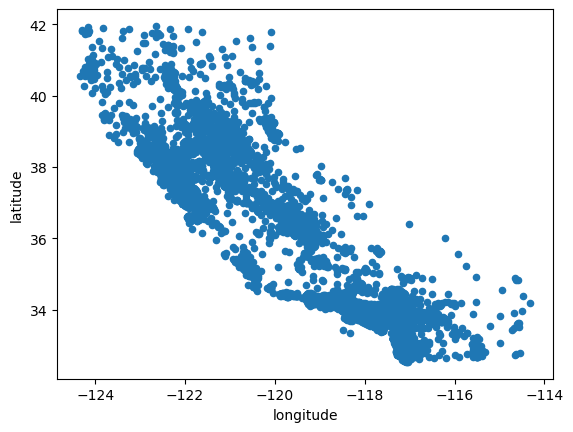

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")

이 그림은 캘리포니아 지역을 잘 나타내지만 어떤 특별한 패턴을 찾기는 힘듭니다. alpha 옵션을 0.1로 주면 데이터 포인트가 밀집된 영역을 잘 보여줍니다.

<Axes: xlabel='longitude', ylabel='latitude'>

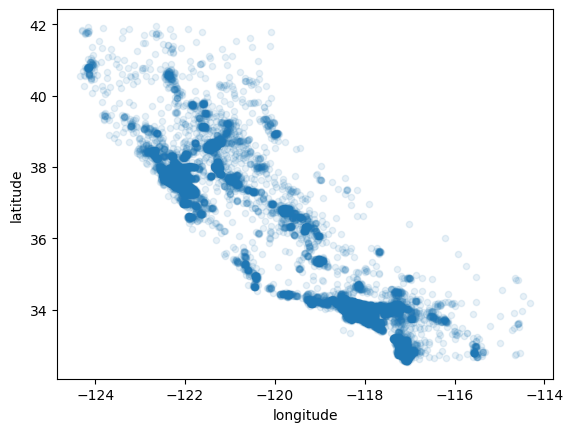

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

훨씬 나아졌네요. 확실히 베이 에어리어$^{Bay \ Area}$와 로스앤젤레스$^{Los \ Angeles}$ 근처, 샌디에고$^{San \ Diego}$ 같이 밀집된 지역이 눈에 잘 띄고, 센트럴 밸리$^{Central \ Valley}$ 특이 새크라멘토$^{Sacramento}$와 프레즈노$^{Fresno}$ 근처를 따라 밀집된 지역이 긴 띠를 이루고 있습니다.\*

우리 뇌는 그림에서 패턴을 잘 인식해내지만 더 두드러진 패턴을 보려면 매개변수를 다양하게 조절해봐야 합니다.

이제 주택 가격을 나타내보겠습니다. 원의 반지름은 구역의 인구를 나타내고(매개변수 `s`), 색상은 가격을 나타냅니다(매개변수 `c`). 여기서는 미리 정의된 컬러 맵$^{color \ map}$ 중 파란색(낮은 가격)에서 빨간색(높은 가격)까지 범위를 가지는 `jet`을 사용합니다(매개변수 `cmap`).\**

---

\* 캘리포니아 해변을 따라서 경도 -122˚ 근처가 새프란시스코가 있는 베이 에어리어 지역이고, 경도 -118˚ 근처가 로스앤젤레스, 경도 -117˚ 근처가 샌디에고 지역입니다. 샌트럴 밸리는 샌프란시스코 위에서부터 로스앤젤레스 위쪽까지 캘리포니아 중앙부에 길게 뻗은 지역을 말합니다. 새크라멘토는 위도 38.5˚, 경도 -121.5˚ 근처이며 프레즈노는 위도 36.7˚, 경도 -119.8˚ 근처입니다. 이 지역 모두 산점도에서 밀도가 높은 것을 확인할 수 있습니다.

\** 베이 에어리어에서 샌디에고까지 해안가 대부분이 붉게 나타납니다(아마 예상했겠지만). 새크라멘토 주변에도 노란색이 나타납니다.

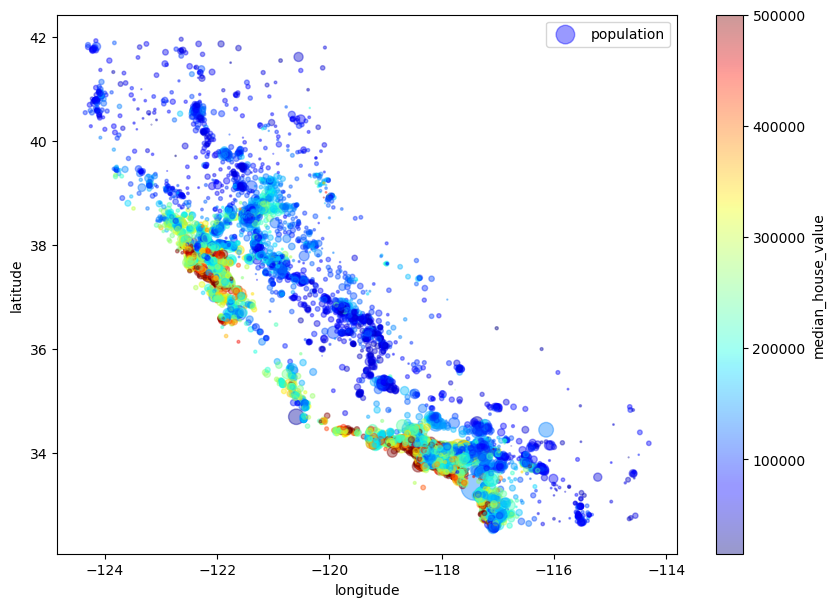

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [32]:
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x2ae43421c60>)

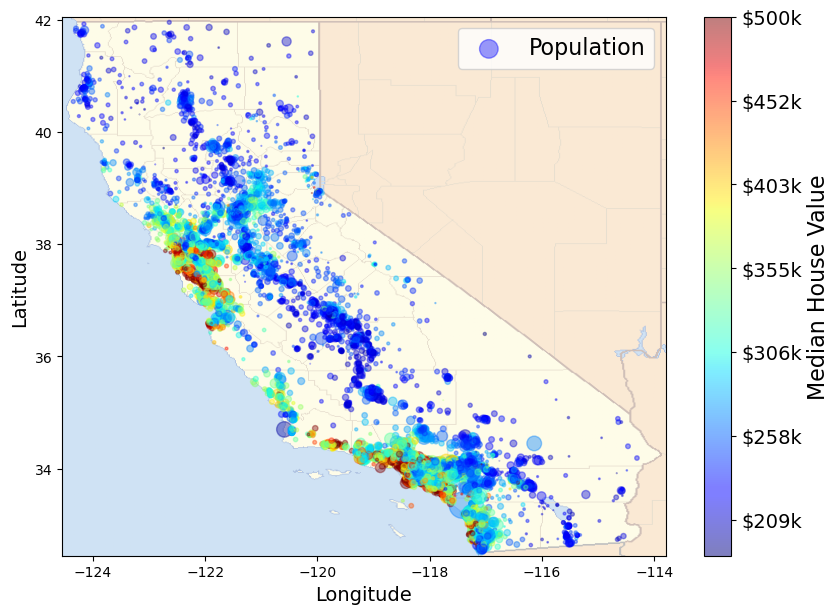

In [33]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

아마 예상했겠지만 이 그림에서 주택 가격은 지역(예를 들면 바다와 인접한 곳)과 인구 밀도에 관련이 매우 크다는 사실을 알 수 있습니다. 군집 알고리즘$^{clustering \ algorithm}$을 사용해 주요 군집을 찾고 군집의 중심까지의 거리를 재는 특성을 추가할 수 있습니다. 해안 근접성 특성이 유용할 수도 있지만, 북부 캘리포니아 지역의 해안가는 주택 가격이 그리 높지 않아 간단한 규칙이 적용되기 어렵습니다.\*

---

\* 북부 캘리포니아는 대략 위도 35˚ 위쪽의 지역으로 베이 에어리어를 제외하고는 해안가의 주택 가격이 높지 않게 나타납니다.

### 2.4.2 상관관계 조사

데이터셋이 너무 크지 않으므로 모든 특성 간의 <span style="color: #008000">표준 상관계수</span>$^{standard \ correlation \ coefficient}$ (피어슨$^{Pearson}$의 $r$이라고도 부릅니다)를 `corr()` 메서드를 이용해 쉽게 계산할 수 있습니다.

In [34]:
corr_matrix = housing.corr()

C:\Users\gsmin\AppData\Local\Temp\ipykernel_20000\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


중간 주택 가격과 다른 특성 사이의 상관관계 크기가 얼마나 되는지 살펴보겠습니다.

In [35]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

상관관계의 범위는 －1부터 1까지입니다. 1에 가까우면 강한 양의 상관관계를 가진다는 뜻입니다. 예를 들어 중간 주택 가격(median_house_value)은 중간 소득(median_income)이 올라갈 때 증가하는 경향이 있습니다. 계수가 －1에 가까우면 강한 음의 상관관계가 보입니다(즉, 북쪽으로 갈수록 주택 가격이 조금씩 내려가는 경향이 있습니다). 마지막으로 계수가 0에 가까우면 선형적인 상관관계가 없다는 뜻입니다. 아래는 가로축과 세로축 사이의 여러 가지 상관계수를 그래프로 보여줍니다.

<span style="color: #FFA500">CAUTION_</span> 상관계수는 선형적인 상관관계만 측정합니다($x$가 증가하면 $y$는 증거하거나 감소합니다). 그래서 비선형적인 관계는 잡을 수 없습니다(예를 들어 $x$가 0에 가까워지면 $y$가 증가하는 경우). 위 그림의 마지막 줄에 있는 그래프들은 두 축이 완전히 독립적이지 않음에도 상관계수가 0입니다. 즉, 비선형 관계의 예입니다. 두 번째 줄은 상관계수가 1이거나 －1인 경우입니다. 상관계수는 기울기와 상관없습니다. 예를 들어 인치$^{inch}$ 단위의 키는 피트$^{feet}$나 나노미터 $^{nanometer}$ 단위의 키와 상관계수가 1입니다.

특성 사이의 상관관계를 확인하는 다른 방법은 숫자형 특성 사이에 산점도를 그려주는 판다스의 `scatter_matrix`함수를 사용하는 것입니다. 여기서는 숫자형 특성이 11개이므로 총 $11^2 = 121$개의 그래프가 되어 한 페이지에 모두 나타낼 수 없으므로, 중간 주택 가격과 상관관계가 높아 보이는 특성 몇 개만 살펴보겠습니다.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

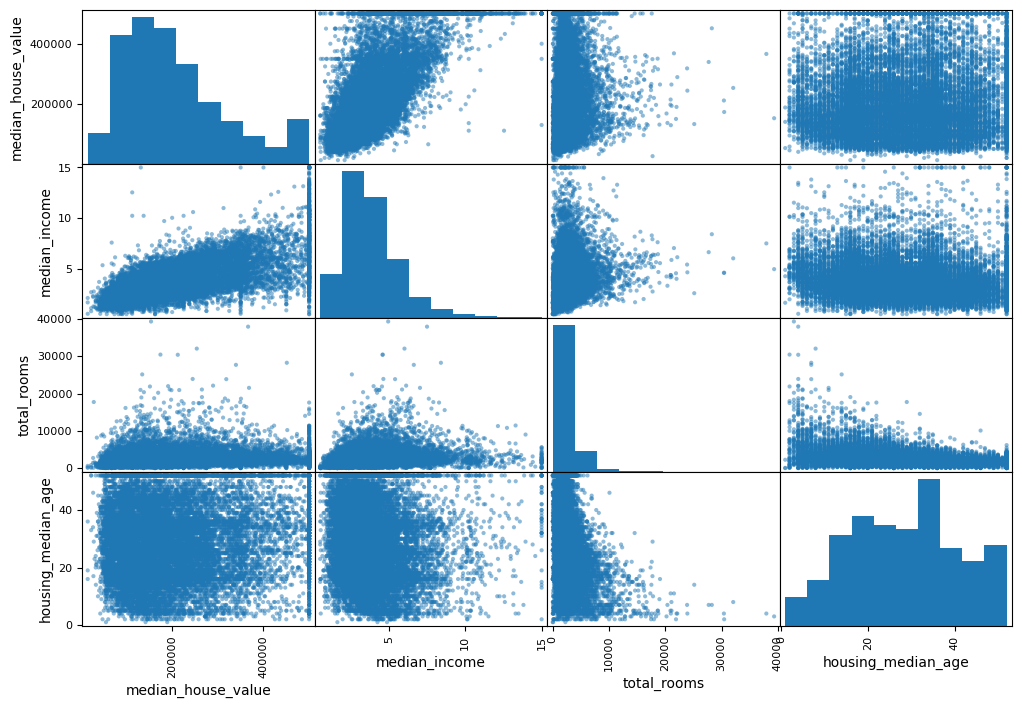

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

대각선 방향(왼쪽 위에서 오른쪽 아래로)은 각 변수 자신에 대한 것이라 그냥 직선이 되므로 유용하지 않습니다. 그래서 판다스는 이곳에 각 특성의 히스토그램을 그립니다(다른 옵션도 가능합니다. 자세한 내용은 판다스 문서를 참고하세요\*).

중간 주택 가격(`median_house_value`)을 예측하는 데 가장 유용할 것 같은 특성은 중간 소득(`median_income`)이므로 상관관계 산점도를 확대해보겠습니다.

---

\* `scatter_matrix` 메서드의 diagonal 매개변수에 히스토그램을 나타내는 'hist'와 커널 밀도 추정(kernel Density Estimation)을 나타내는 'kde'를 지정할 수 있습니다. 기본값은 'hist'입니다.

(0.0, 16.0, 0.0, 550000.0)

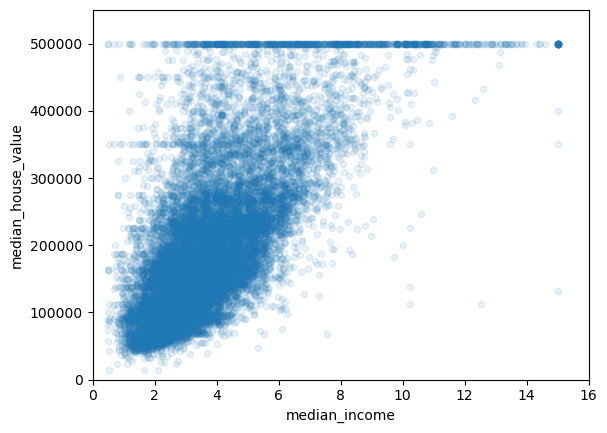

In [37]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

이 그래프는 몇 가지 사실을 보여줍니다. 첫째, 상관관계가 매우 강합니다. 위쪽으로 향하는 경향을 볼 수 있으며 포인트들이 너무 널리 퍼져 있지 않습니다. 둘째, 앞서 본 가격 제한값이 ＄500,000에서 수평선으로 잘 보입니다. 하지만 이 그래프에서 직선에 가까운 형태를 더 볼 수 있습니다. ＄450,000 근처에 수평선이 보이고 ＄350,000와 ＄280,000에도 있고 그 아래 조금 더 보입니다. 알고리즘이 데이터에서 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋습니다.

### 2.4.3 특성 조합으로 실험

앞 절에서 데이터를 탐색하고 통찰을 얻는 여러 방법에 대한 아이디어를 얻었기 바랍니다. 머신러닝 알고리즘에 주입하기 전에 정제해야 할 조금 이상한 데이터를 확인했고, 특성 사이(특히 타깃 속성과의 사이)에서 흥미로운 상관관계를 발견했습니다. 어떤 특성은 꼬리가 두꺼운 분포라서 데이터를 변형해야 할 것입니다(예를 들면 로그 스케일로). 물론 프로젝트마다 처한 상황은 다르겠지만 일반적인 아이디어는 비슷합니다.

머신러닝 알고리즘용 데이터를 준비하기 전에 마지막으로 해볼 수 있는 것은 여러 특성의 조합을 시도해보는 것입니다. 예를 들어 특정 구역의 방 개수는 얼마나 많은 가구 수가 있는지 모른다면 그다지 유용하지 않습니다. 진짜 필요한 것은 가구당 방 개수입니다. 비슷하게 전체 침실 개수도 그 자체로는 유용하지 않습니다. 즉, 방 개수와 비교하는 게 낫습니다. 가구당 인원도 흥미로운 특성 조합일 것 같습니다. 이런 특성들을 만들어봅시다.

In [38]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

상관관계 행렬을 다시 확인해보겠습니다.

In [39]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\gsmin\AppData\Local\Temp\ipykernel_20000\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

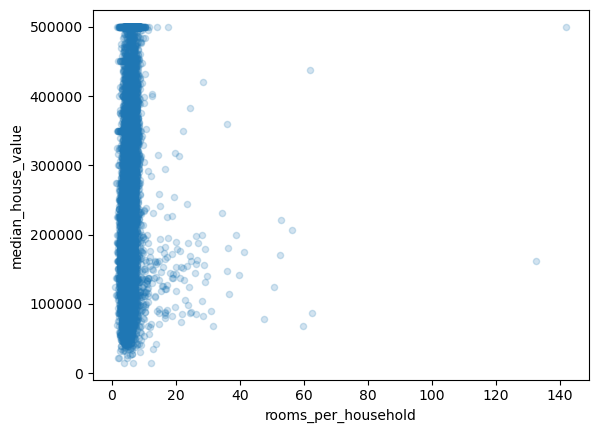

In [40]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.show()

In [41]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575635     35.639314           28.653404   2622.539789   
std        2.001828      2.137963           12.574819   2138.417080   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.000000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       534.914639   1419.687379    497.011810       3.875884   
std        412.665649   1115.663036    375.696156       1.904931   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.566950   
50%        433.000000   1164.000000    408.000000       3.541550   
75%        644.000000   1719.000000    602.000000       4.745325   
max       6210.000000  35682.000000   5358.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        16512.000000         16512.000000       16354.000000   
mean        207005.322372             5.440406           0.212873   
std         115701.297250             2.611696           0.057378   
min          14999.000000             1.130435           0.100000   
25%         119800.000000             4.442168           0.175304   
50%         179500.000000             5.232342           0.203027   
75%         263900.000000             6.056361           0.239816   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              16512.000000  
mean                   3.096469  
std                   11.584825  
min                    0.692308  
25%                    2.431352  
50%                    2.817661  
75%                    3.281420  
max                 1243.333333

나쁘지 않네요. 새로운 `bedrooms_per_room` 특성은 전체 방 개수나 침실 개수보다 중간 주택가격과의 상관관계가 훨씬 높습니다. 확실히 침실／방의 비율이 낮은 집은 더 비싼 경향이 있습니다. 가구당 방 개수도 구역 내 전체 방 개수보다 더 유용합니다. 당연히 더 큰 집이 더 비쌉니다.

이 탐색 단계는 완벽하지 않습니다. 시작을 잘해서 빨리 통찰을 얻는 것이 처음 프로토타입을 잘 만드는 데 도움이 될 것입니다. 하지만 이는 반복적인 과정입니다. 프로토타입을 만들고 실행한 후 그 결과를 분석해서 더 많은 통찰을 얻고 다시 이 탐색 단계로 돌아오게 됩니다.\*

---

\* 대부분의 소프트웨어 프로젝트가 그렇지만 특히 머신러닝 프로젝트는 빠른 프로토타이핑과 반복적인 프로세스가 권장됩니다.

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

이제 머신러닝 알고리즘을 위해 데이터를 준비할 차례입니다. 이 작업을 수동으로 하는 대신 함수를 만들어 자동화해야 하는 이유가 있습니다.

- 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있습니다(예를 들어 다음번에 새로운 데이터셋을 사용할 때).
- 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축하게 됩니다.
- 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는 데 이 함수를 사용할 수 있습니다.
- 여러 가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 가장 좋은지 확인하는 데 편리합니다.

하지만 먼저 원래 훈련 세트로 복원하고(`strat_train_set`을 다시 한번 복사합니다), 예측 변수와 타깃값에 같은 변형을 적용하지 않기 위해 예측 변수와 레이블을 분리하겠습니다(`drop()` 은 데이터 복사본을 만들며 `strat_train_set` 에는 영향을 주지 않습니다).

In [42]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

### 2.5.1 데이터 정제

대부분의 머신러닝 알고리즘은 누락된 특성을 다루지 못하므로 이를 처리할 수 있는 함수를 몇개 만들겠습니다. 앞서 `total_bedrooms` 특성에 값이 없는 경우를 보았는데 이를 고쳐보겠습니다. 방법은 세 가지입니다.

- 해당 구역을 제거합니다.
- 전체 특성을 삭제합니다.
- 어떤 값으로 채웁니다(0, 평균, 중간값 등).

데이터프레임의 `dropna()`, `drop()`, `fillna()` 메서드를 이용해 이런 작업을 간단하게 처리할 수 있습니다.

```
housing.dropna(subset=["total_bedrooms"])    # 옵션 1
housing.drop("total_bedrooms", axis=1)       # 옵션 2
median = housing["total_bedrooms"].median()  # 옵션 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

In [43]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
16885    -122.40     37.58                26.0       3281.0             NaN   

       population  households  median_income ocean_proximity  
1606        825.0       626.0         2.9330        NEAR BAY  
10915      1970.0       499.0         3.4193       <1H OCEAN  
19150       954.0       397.0         3.7813       <1H OCEAN  
4186        835.0       294.0         4.2891       <1H OCEAN  
16885      1145.0       480.0         6.3580      NEAR OCEAN

In [44]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

In [45]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2

longitude  latitude  housing_median_age  total_rooms  population  \
1606     -122.08     37.88                26.0       2947.0       825.0   
10915    -117.87     33.73                45.0       2264.0      1970.0   
19150    -122.70     38.35                14.0       2313.0       954.0   
4186     -118.23     34.13                48.0       1308.0       835.0   
16885    -122.40     37.58                26.0       3281.0      1145.0   

       households  median_income ocean_proximity  
1606        626.0         2.9330        NEAR BAY  
10915       499.0         3.4193       <1H OCEAN  
19150       397.0         3.7813       <1H OCEAN  
4186        294.0         4.2891       <1H OCEAN  
16885       480.0         6.3580      NEAR OCEAN

In [46]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3

In [47]:
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0           433.0   
10915    -117.87     33.73                45.0       2264.0           433.0   
19150    -122.70     38.35                14.0       2313.0           433.0   
4186     -118.23     34.13                48.0       1308.0           433.0   
16885    -122.40     37.58                26.0       3281.0           433.0   

       population  households  median_income ocean_proximity  
1606        825.0       626.0         2.9330        NEAR BAY  
10915      1970.0       499.0         3.4193       <1H OCEAN  
19150       954.0       397.0         3.7813       <1H OCEAN  
4186        835.0       294.0         4.2891       <1H OCEAN  
16885      1145.0       480.0         6.3580      NEAR OCEAN

옵션 3을 선택하면 훈련 세트에서 중간값을 계산하고 누락된 값을 이 값으로 채워 넣어야 합니다. 계산한 중간값을 저장하는 것을 잊지 마세요. 나중에 시스템을 평가할 때 테스트 세트에 있는 누락된 값과 시스템이 실제 운영될 때 새로운 데이터에 있는 누락된 값을 채워넣는데 필요하기 때문입니다.\*

사이킷런의 `SimpleTemputer` 는 누락된 값을 손쉽게 다루도록 해줍니다. 어떻게 사용하는지 살펴보죠. 먼저 누락된 값을 특성의 중간값으로 대체한다고 지정하여 `SimpleTemputer` 의 객체를 생성합니다.\**

---

\* 훈련 세트에서 학습한 것이 소용없어지므로 테스트 세트의 중간값을 사용하면 안 됩니다.

\** 사이킷런 0.22 버번에서 최근접 이웃 방식으로 누락된 값을 대체하는 KNNImputer 클래스가 추되었습니다.

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성인 `ocean_proximity` 를 제외한 데이터 복사본을 생성합니다.

In [49]:
housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

이제 imputer 객체의 **fit()** 메서드를 사용해 훈련 데이터에 적용할 수 있습니다.

In [50]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

imputer는 각 특성의 중간값을 계산해서 그 결곽를 객체의 `statistics_` 속성에 저장합니다. `total_bedrooms` 특성에만 누락된 값이 있지만 나중에 시스템이 서비스될 때 새로운 데이터에서 어떤 값이 누락될지 확신할 수 없으므로 모든 수치형 특성에 imputer를 적용하는 것이 바람직합니다.

In [51]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [52]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

이제 학습된 imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿀 수 있습니다.

In [53]:
X = imputer.transform(housing_num)

이 결과는 변형된 특성들이 들어 있는 평범한 넘파이 배열입니다. 이를 다시 판다스 데이터프레임으로 간단히 되돌릴 수 있습니다.

In [54]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [55]:
housing_tr.loc[sample_incomplete_rows.index.values]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0           433.0   
10915    -117.87     33.73                45.0       2264.0           433.0   
19150    -122.70     38.35                14.0       2313.0           433.0   
4186     -118.23     34.13                48.0       1308.0           433.0   
16885    -122.40     37.58                26.0       3281.0           433.0   

       population  households  median_income  
1606        825.0       626.0         2.9330  
10915      1970.0       499.0         3.4193  
19150       954.0       397.0         3.7813  
4186        835.0       294.0         4.2891  
16885      1145.0       480.0         6.3580

In [56]:
imputer.strategy

'median'

In [57]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964

**사이킷런의 설계 철학**

사이킷런의 API는 아주 잘 설계되어 있습니다. 주요 설계 원칙은 다음과 같습니다.$^1$

- <span style="color: #008000">일관성</span>: 모든 객체가 일관되고 단순한 인터페이스를 공유합니다.
    - <span style="color: #008000">추정기</span>$^{estimator}$: 데이터셋을 기반으로 일련의 모델 파라미터들을 추정하는 객체를 추정기라고 합니다(예를 들어 imputer 객체는 추정기입니다). 추정 자체는 `fit()` 메서드에 의해 수행되고 하나의 매개변수로 하나의 데이터셋만 전달합니다(지도 학습 알고리즘에서는 매개변수가 두 개로, 두 번째 데이터셋은 레이블을 담고 있습니다). 추정 과정에서 필요한 다른 매개변수들은 모두 하이퍼파라미터로 간주되고(예를 들면 imputer 객체의 strategy 매개변수), 인스턴스 변수$^2$ 로 저장됩니다(보통 생성자의 매개변수로 전달합니다).$^3$

- <span style="color: #008000">변환기</span>$^{transformer}$: (imputer 같이) 데이터셋을 변환하는 추정기를 변환기라고 합니다. 여기서도 API는 매우 단순합니다. 변환은 데이터셋을 매개변수로 전달받은 `transform()` 메서드가 수행합니다. 그리고 변환된 데이터셋을 반환합니다. 이런 변환은 일반적으로 imputer의 경우와 같이 학습된 모델 파라미터에 의해 결정됩니다.$^4$ 모든 변환기는 `fit()` 과 `transform()` 을 연달아 호출하는 것과 동일한 `fit_transform()` 메서드도 가지고 있습니다(이따금 `fit_transform()` 이 최적화되어 있어서 더 빠릅니다).
    - <span style="color: #008000">예측기</span>$^{predictor}$: 일부 측정기는 주어진 데이터셋에 대해 예측을 만들 수 있습니다. 예를 들어 앞 장에 나온 `LinearRegression` 모델이 예측기입니다. 어떤 나라의 1인당 GDP가 주어질 때 삶의 만족도를 예측했습니다. 예측기의 `predict()` 메서드는 새로운 데이터셋을 받아 이에 상응하는 예측값을 반환합니다. 또한 테스트 세트(지도 학습 알고리즘이라면 레이블도 함께)를 사용해 예측의 품질을 측정하는 `score()` 메서드를 가집니다.$^5$

- <span style="color: #008000">검사 가능</span>: 모든 추정기의 하이퍼파라미터는 공개$^{public}$ 인스턴스 변수로 직접 접근할 수 있고(예를 들면 imputer.strategy), 모든 추정기의 학습된 모델 파라미터도 접미사로 밑줄을 붙여서 공개 인스턴스 변수로 제공됩니다(예를 들면 imputt.statistics_).$^6$

- <span style="color: #008000">클래스 남용 방지</span>: 데이터셋을 별도의 클래스가 아니라 넘파이 배열이나 사이파이 희소$^{sparse}$ 행렬로 표현합니다. 하이퍼파라미터는 보통의 파이썬 문자열이나 숫자입니다.

- <span style="color: #008000">조합성</span>: 기존의 구성요소를 최대한 재사용합니다. 앞으로 보겠지만 예를 들어 여러 변환기를 연결한 다음 마지막에 추정기 하나를 배치한 `PipeLine` 추정기를 쉽게 만들 수 있습니다.

- <span style="color: #008000">합리적인 기본값</span>: 사이킷런은 일단 돌아가는 기본 시스템을 빠르게 만들 수 있도록 대부분의 매개변수에 합리적인 기본값을 지정해두었습니다.

---

$^1$ 설계 원칙에 대한 더 자세한 내용은 다음을 참고하세요. https://homl.info/11  
$^2$ 인스턴스 변수는 객체지향 프로그래밍에서 객체가 각각 독립적으로 가지고 있는 변수입니다.  
$^3$ 파이썬 객체를 만들 때 전달하는 매개변수를 말합니다(예를 들면 SimpleImputer(strategy="median")). 이 매개변수는 파이썬에서 새로운 객체가 생성될 때 자동으로 호출되는 특수 메서드인 \_\_init\_\_에 전달됩니다. 객체 생성 시 호출되는 또 다른 특수 메서드인 \_\_new\_\_도 있지만 종종 \_\_init\_\_를 생성자라고 부릅니다.  
$^4$ imputer가 실제로 계산한 것은 데이터셋에 있는 각 특성의 중간값입니다. 사이킷런에서는 변환기도 추정기와 인터페이스가 같기 때문에 학습한다고 표현합니다.  
$^5$ 어떤 예측기는 예측의 확신을 측정하는 메서드도 제공합니다. 분류 모델이 제공하는 `predict_proba()` 나 `decision_function()` 메서드를 말합니다. 이 메서드들은 3장에서 자세히 소개합니다.  
$^6$ 사실 파이썬에는 비공개(private) 인스턴스 변수가 없습니다. 따라서 모든 인스턴스 변수는 직접 참조가 가능합니다.

### 2.5.2 텍스트와 범주현 특성 다루기

지금까지 수치형 특성만 다루었습니다. 이제 텍스트 특성을 살펴봅시다. 이 데이터셋에는 `ocean_proximity` 하나뿐입니다. 처음 10개 샘플에서 이 특성값을 확인해보죠.

In [58]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

이는 임의의 텍스트가 아닙니다. 가능한 값을 제한된 개수로 나열한 것이고 각 값은 카테고리를 나타냅니다. 따라서 이 특성은 범주형 특성입니다. 대부분의 머신러닝 알고리즘은 숫자를 다루므로 이 카테고리를 텍스트에서 숫자로 변환하겠습니다. 이를 위해 사이킷런의 `OrdinalEncoder`클래스를 사용합니다.\*

---

\* 이 클래스는 사이킷런 0.20 버전에 추가되었습니다. 만약 이전 버전을 사용한다면 업그레이드하는 것이 좋습니다. 아니면 판다스의 Series.factorize() 메서드를 사용하세요.

In [59]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

`categories_` 인스턴스 변수를 사용해 카테고리 목록을 얻을 수 있습니다. 범주형 특성마다 카테고리들의 1D 배열을 담은 리스트가 반환됩니다(이 경우는 범주형 특성이 하나만 있으므로 배열 하나를 담은 리스트가 반환됩니다).

In [60]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

이 표현 방식의 문제는 머신러닝 알고리즘이 가까이 있는 구 값이 떨어져 있는 두 값보다 더 비슷하다고 생각한다는 점입니다. 일부 경우에는 괜찮습니다(예를 들어 'bad'. 'average', 'good', 'excellent'와 같은 순서가 있는 카테고리의 경우). 하지만 이는 `ocean_proximity` 열에 해당되지 않습니다(예를 들어 카테고리 0과 1보다 카테고리 0과 4가 확실히 더 비슷합니다). 이 문제는 일반적으로 카테고리별 이진 특성을 만들어 해결합니다. 카테고리가 '<1H OCEAN'일 때 한 특성이 1이고(그 외 특성은 0), 카테고리가 'INLAND'일 때 다른 한 특성이 1이 되는(역시 그 외에는 0) 식입니다. 한 특성만 1이고(핫) 나머지는 0이므로 이를 <span style="color: #008000">원-핫 인코딩</span>$^{one-hot \ encoding}$이라고 부릅니다. 이따금 새로운 특성을 <span style="color: #008000">더미</span>$^{dummy}$ 특성이라고도 부립니다. 사이킷런은 범주의 값을 원\-핫 벡터로 바꾸기 위한 `OneHotEncoder` 클래스를 제공합니다.\*

---

\* 사이킷런의 0.20 버전 이전에는 이 메서드가 정수 범주형 값만 인코딩할 수 있습니다. 0.20 버전부터 텍스트 범주형 값을 포함하여 다른 입력 타입도 처리할 수 있습니다.

In [61]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

출력을 보면 넘파이 배열이 아니고 사이파이$^{SciPy}$ <span style="color: #008000">희소 행렬</span>$^{sparse \ matrix}$입니다. 이는 수천 개의 카테고리가 있는 범주형 특성일 경우 매우 효율적입니다. 이런 특성을 원\-핫 인코딩하면 열이 수천 개인 행렬로 변하고 각 행은 1이 하나뿐이고 그 외에는 모두 0으로 채워져 있을 것입니다. 0을 모두 메모리에 저장하는 것은 낭비이므로 희소 행렬은 0이 아닌 원소의 위치만 저장합니다. 이 행렬을 거의 일반적인 2차원 배열처럼 사용할 수 있지만\* (밀집된) 넘파이 배열로 바꾸려면 `toarray()` 메서드를 호출하면 됩니다.

---

\* 자세한 내용은 사이파이 문서를 참고하세요. housing_cat_1hot은 사이파이가 지원하는 희소 행렬 중 행을 압축하는 csr_matrix입니다. csr_matrix에서 지원하는 메서드는 다음 주소를 참고하세요. https://goo.gl/rakTep

In [62]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

여기에서도 인코더의 `categories_` 인스턴스 변수를 사용해 카테고리 리스트를 얻을 수 있습니다.

In [63]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<span style="color: #FFA500">TIP_</span> 카테고리 특성이 담을 수 있는 카테고리 수가 많다면(예를 들면 국가 코드, 직업, 생물 종류 등) 원-핫 인코딩은 많은 수의 입력 특성을 만듭니다. 이는 훈련을 느리게 하고 성능을 감소시킬 수 있습니다. 이런 현상이 나타나면 범주형 입력값을 이 특성과 관련된 숫자형 특성으로 바꾸고 싶을 것입니다. 예를 들어 ocean_proximity 특성을 해안까지 거리로 바꿀 수 있습니다(비슷하게 국가 코드는 국가의 인구와 1인당 GDP로 바꿀 수 있습니다). 또는 각 카테고리를 <span style="color: #008000">임베딩</span>$^{embedding}$이라고 부르는 학습 가능한 저차원 벡터로 바꿀 수 있습니다. 훈련하는 동안 각 카테고리의 표현이 학습됩니다. 이는 <span style="color: #008000">표현 학습</span>$^{representation \ learning}$의 한 예입니다(자세한 내용은 13장과 17장을 참조하세요).

### 2.5.3 나만의 변환기

사이킷런이 유용한 변환기를 많이 제공하지만 특별한 정제 작업이나 어떤 특성들을 조합하는 등의 작업을 위해 자신만의 변환기를 만들어야 할 때가 있습니다. 내가 만든 변환기를 (파이프라인과 같은) 사이킷런의 기능과 매끄럽게 연동하고 싶을 것입니다. 사이킷런은 (상속이 아닌) 덕 다이핑$^{duck \ typing}$\* 을 지원하므로 `fit()` (self를 반환), `transform()`, `fit_transform()` 메서드를 구현한 파이썬 클래스를 만들면 됩니다.

마지막 메서드는 `TransformerMixin`을 상속하면 자동으로 생성됩니다.\** 또한 BaseEstumator를 상속하면(그리고 생성자에 \*args나 \*\*kargs를 사용하지 않으면) 하이퍼파라미터 튜닝에 필요한 두 메서드(get_params()와 set_params())를 추가로 얻게 됩니다.\***

예를 들어 다음은 앞서 이야기한 조합 특성을 추가하는 간단한 변환기입니다.

---

\* 덕 타이핑은 상속이나 인터페이스 구현이 아니라 객체의 속성이나 메서드가 객체의 유형을 결정하는 방식을 말합니다.  
\** 파이썬에서 이름에 Mixin이 있으면 객체의 기능을 확장하려는 목적으로 만들어진 클래스를 나타냅니다. TransformerMixin은 fit_transform() 메서드 하나를 가지고 있으며 이를 상속하는 모든 파이썬 클래스에 이 메서드를 제공합니다. TransformerMixin의 fit_transform() 메서드는 단순히 fit()과 transform()을 메서드 연결(method chaining)한 것입니다.  
\*** get_params()와 set_params() 함수는 사이킷런의 파이프라인과 그리드 탐색에 꼭 필요한 메서드이므로 모든 추정기와 변환기는 VaseEstimator를 상속해야 합니다. 이 두 메서드는 생성자에 명시된 매개변수만을 참조하므로 \*args나 \*\*kargs는 사용할 수 없습니다. 더 자세한 내용은 사이킷런 문서를 참고하세요. https://goo.gl/fkQWsN

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

책에서는 간단하게 인덱스 (3, 4, 5, 6)을 하드코딩했지만 다음처럼 동적으로 처리하는 것이 더 좋습니다

In [65]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기

또한 `housing_extra_attribs`는 넘파이 배열이기 때문에 열 이름이 없습니다(안타깝지만 사이킷런을 사용할 때 생기는 문제입니다). `DataFrame`으로 복원하려면 다음과 같이 할 수 있습니다

In [66]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
12655   -121.46    38.52               29.0      3873.0          797.0   
15502   -117.23    33.09                7.0      5320.0          855.0   
2908    -119.04    35.37               44.0      1618.0          310.0   
14053   -117.13    32.75               24.0      1877.0          519.0   
20496    -118.7    34.28               27.0      3536.0          646.0   

      population households median_income ocean_proximity rooms_per_household  \
12655     2237.0      706.0        2.1736          INLAND            5.485836   
15502     2015.0      768.0        6.3373      NEAR OCEAN            6.927083   
2908       667.0      300.0         2.875          INLAND            5.393333   
14053      898.0      483.0        2.2264      NEAR OCEAN            3.886128   
20496     1837.0      580.0        4.4964       <1H OCEAN            6.096552   

      population_per_household  
12655                 3.168555  
15502                 2.623698  
2908                  2.223333  
14053                 1.859213  
20496                 3.167241

이 경우에는 변환기가 `add_bedrooms_per_room` 하이퍼파라미터 하나를 가지며 기본값을 `True`로 지정합니다(합리적인 기본값을 주는 것이 좋습니다). 이 특성을 추가하는 것이 머신러닝 알고리즘에 도움이 될지 안 될지 이 하이퍼파라미터로 쉽게 확인해볼 수 있습니다. 일반적으로 100% 확신이 없는 모든 데이터 준비 단계에 대해 하이퍼파라미터를 추가할 수 있습니다. 이런 데이터 준비 단계를 자동화할수록 더 많은 조합을 자동으로 시도해볼 수 있고 최상의 조합을 찾을 가능성을 매우 높여줍니다(그리고 시간도 많이 절약됩니다).

### 2.5.4 특성 스케일링

데이터에 적용할 가장 중요한 변환 중 하나가 <span style="color: #008000">특성 스케일링</span>$^{feature \ scaling}$입니다. 몇 가지를 빼고는,\* 머신러닝 알고리즘은 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않습니다. 주택 가격 데이터도 이에 해당합니다. 즉, 전체 방 개수의 범위는 6에서 39,320인 반면 중간 소득의 범위는 0에서 15까지입니다. 타깃값에 대한 스케일링은 일반적으로 불필요합니다.

모든 특성의 범위를 같도록 만들어주는 방법으로 <span style="color: #008000">min-max 스케일링</span>과 <span style="color: #008000">표준화</span>$^{standardization}$가 널리 사용됩니다.

min-max 스케일링이 가장 간단합니다(많이 사람이 이를 <span style="color: #008000">정규화</span>$^{normalization}$\*\*라고 부릅니다). 0\~1 범위에 들도록 값을 이동하고 스케일을 조정하면 됩니다. 데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나누면 이렇게 할 수 있습니다. 사이킷런에는 이에 해당하는 `MinMaxScaler` 변환기를 제공합니다. 0\~1 사이를 원하지 않는다면 `feature_range` 매개변수로 범위를 변경할 수 있습니다.

표준화는 다릅니다. 먼저 평균을 뺀 후(그래서 표준화를 하면 항상 평균이 0이 됩니다) 표준편차로 나누어 결과 분포의 분산이 1이 되도록 합니다. min-max 스케일링과는 달리 표준화는 범위의 상한과 하한이 없어 어떤 알고리즘에서는 문제가 될 수 있습니다(예를 들어 신경망은 종종 입력값의 범위로 0에서 1 사이를 기대합니다). 그러나 표준화는 이상치에 영향을 덜 받습니다. 예를 들어 중간 소득을 (잘못해서) 100이라 입력한 구역을 가정해봅시다. min-max 스케일링은 0\~15 사이의 모든 다른 값을 0\~0.15로 만들어버리겠지만, 표준화는 크게 영향받지 않습니다. 사이킷런에서는 표준화를 위한 `StandardScaler` 변환기가 있습니다.

<span style="color: #FFA500">CAUTION_</span> 모든 변환기에서 스케일링은 (테스트 세트가 포함된) 전체 데이터가 인고 훈련 데이터에 대해서만 fit() 메서드를 적용해야 합니다. 그런 다음 훈련 세트와 테스트 세트(그리고 새로운 데이터)에 대해 transform() 메서드를 사용합니다.

---

\* 6장과 7장에서 다루는 트리 기반 알고리즘이 이에 해당합니다.  
\** 사이킷런에는 입력 데이터에서 각 행의 $\ell_2$ 노름이 1이 되도록 조정하는 `Normalizar`라는 전처리 기능이 있으며 min-max 스케일링과는 전혀 다른 결과를 만듭니다. 정규화는 여러 의미로 다양하게 사용되므로 혼동하지 마세요.

### 2.5.5 변환 파이프라인

앞서 보았듯이 변환 단계가 많으며 정확한 순서대로 실행되어야 합니다. 다행이 사이킷런에는 연속된 변환을 순서대로 처리할 수 있도록 도와주는 `Pipeline` 클래스가 있습니다. 다음은 숫자 특성을 처리하는 간단한 파이프라인입니다.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [68]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

`Pipeline` 은 연속된 단계를 나타내는 이름／추정기 쌍의 목록을 입력으로 받습니다. 마지막 단계에는 변환기와 추정기를 모두 사용할 수 있고 그 외에는 모두 변환기여야 합니다(즉, fit_transform() 메서드를 가지고 있어야 합니다\*). 이름은 (고유하고 이중 밑줄 문자인 \_\_를 포함하지 않는다면) 무어이든 상관없습니다. 나중에 하이퍼파라미터 튜닝할 때 필요할 것입니다.

파이프라인의 `fit()` 메서드를 호출하면 모든 변환기의 `fit_transform()` 메서드를 순서대로 호출하면서 \** 한 단계의 출력을 다음 단계의 입력으로 전달합니다. 마지막 단계에서는 `fit()` 메서드만 호출합니다.

파이프라인 객체는 마지막 추정기와 동일한 메서드를 제공합니다. 이 예에서는 마지막 추정기가 변환기 `StandardScaler` 이므로 파이프라인이 데이터에 대해 모든 변환을 순서대로 적용하는 `transform()` 메서드를 가지고 있습니다(또한 앞에서 사용한 `fit_transform()` 메서드도 가지고 있습니다).

지금까지 범주형 열과 수치형 열을 각각 다루었습니다. 하나의 변환기로 각 열마다 적잘한 변환을 적용하여 모든 열을 처리할 수 있다면 더 편리할 것입니다. 사이킷런 0.20버전에서 이런 기능을 위해 `ColumnTransformer` 가 추가되었습니다. 다행히도 이 클래스는 판다스 DataFrame과 잘 동작합니다. 이 클래스를 사용해 주택 가격 데이터에 전체 변환을 적용해보겠습니다. \***

---

\* 또는 `fit()` 과 `transform()` 메서드만 가지고 있어도 됩니다.  
\** `fit_transform()` 메서드가 없다면 `fit()` 과 `transform()` 을 차례로 호출합니다.  
\*** 사이킷런 0.22 버전에서 열 이름이나 데이터 타입을 기반으로 열을 선택할 수 있는 make_column_selector() 함수가 추가되었습니다.

In [69]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [70]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [71]:
housing_prepared.shape

(16512, 16)

먼저 `ColumnTransformer` 클래스를 임포트합니다. 그다음 수치형 열 이름의 리스트와 범주형 열 이름의 리스트를 만듭니다. 그다음 `ColumnTransformer` 클래스 객체를 만듭니다. 이 생성자는 튜플의 리스트를 받습니다. 각 튜플은 이름,\* 변환기, 변환기가 적용될 열 이름(또는 인덱스)의 리스트로 이루어집니다. 이 예에서 수치형 열은 앞서 정의한 `num_pipeline`을 사용해 변환되고 범주형 열은 `OneHotEncoder`을 사용해 변환되어야 합니다. 마지막으로 `ColumnTransforemr`를 주택 데이터에 적용합니다. 각 변환기를 적절한 열에 적용하고 그 결과를 두 번째 축을 따라 연결합니다(변환기는 동일한 개수의 행을 반환해야 합니다).

`OneHotEncoder`는 희소 행렬을 반환하지만 `num_piprline`는 밀집 행렬을 반환합니다. 희소 행렬과 밀집 행렬이 섞여 있을 때 `ColumnTransformer`는 최종 행렬의 밀집 정도를 추정합니다(즉 0이 아닌 원소의 비율). 밀집도가 임곗값(기본적으로 `sparse_threshold=0.3`입니다)보다 낮으면 희소 행렬을 반환합니다. 이 예에서는 밀집 행렬이 반환됩니다. 성공입니다! 전체 주택 데이터를 받아 각 열에 적절한 변환을 적용하는 전처리 파이프라인을 만들었습니다.

<span style="color: #FFA500">TIP</span> 튜플에 변환기를 사용하는 대신 삭제하고 싶은 열이 있다면 "drop" 문자열로 지정하거나 변환을 적용하지 않을 열이 있다면 "passthrough"로 지정할 수 있습니다. 기본적으로 나머지 열은(즉 나열되지 않은 열) 삭제됩니다. 하지만 이런 열을 다르게 처리하고 싶다면 remainder 하이퍼파라미터에 어떤 변환기를 (또는 "passthough"를 지정할 수 있습니다.\**

---

\* 파이프라인처럼 이 이름은 이중 밑줄 문자를 포함하지 않는 한 어떤 것도 가능합니다.  
\** remainder 파라미터의 기본값은 "drop"입니다.

사이킷런 0.19나 그 이전 버전을 사용한다면 `sklearn-pandas`와 같은 서드파티$^{third-party}$ 라이브러리를 사용할 수 있습니다. 또는 `ColumnTransformer`와 동일한 기능을 가진 사용자 정의 변환기를 만들 수 있습니다. 또는 여러 변환기를 적용하고 결과를 합쳐주는 `FeatureUnion` 클래스를 사용할 수 있습니다. 하지만 각 변환기에 열을 따로 지정할 수 없고 전체 데이터에 모두 적용됩니다. 이 문제를 해결하기 위해 열을 선택해주는 사용자 정의 변환기를 만들 수 있습니다(주피터 노트북의 예제를 참고하세요).

## 2.6 모델 선택과 훈련

드디어 마지막입니다! 문제를 정의한 후 데이터를 읽어 들이고 탐색했습니다. 그리고 훈련 세트와 테스트 세트로 나누고 머신러닝 알고리즘에 주입할 데이터를 자동으로 정제하고 준비하기 위해 변환 파이프라인을 작성했습니다. 이제 머신러닝 모델을 선택하고 훈련시킬 준비가 되었습니다.

### 2.6.1 훈련 세트에서 훈련하고 평가하기

이전 단계의 작업 덕분에 생각보다 훨신 간단해졌습니다. 먼저 앞 장에서 했던 것처럼 선형 회귀 모델을 훈련시켜보겠습니다.

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

이게 끝입니다! 완전히 작동하는 선형 회귀 모델을 만들었습니다. 훈련 세트에 있는 몇 개 샘플에 대해 적용해보겠습니다.

In [73]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 보겠습니다
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [74]:
print("레이블:", list(some_labels))

레이블: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [75]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

아주 정확한 예측은 아니지만(예를 들어 첫 번째 예측은 40% 가까이 벗어났습니다) 작동은 합니다. 사이킷런의 `mean_spuare_error` 함수를 사용해 전체 훈련 세트에 대한 이 회귀 모델의 RMSE를 측정해보겠습니다.

In [76]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018743

<span style="color: #FFA500">NOTE_</span> 사이킷런 0.22 버전부터는 squared=False 매개변수로 mean_squared_error() 함수를 호출하면 RMSE를 바로 얻을 수 있습니다.

In [77]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915801

없는 것보다는 낫지만 확실히 좋은 점수는 아닙니다. 대부분 구역의 중간 주택 각격은 ＄130,000에서 ＄265,000 사이입니다. 그러므로 예측 오차가 ＄68,628인 것은 매우 만족스럽지 못합니다. 이는 모델이 훈련 데이터에 과소적합된 사례입니다. 이런 상황은 특성들이 좋은 예측을 만들 만큼 충분한 정보를 제공하지 못했거나 모델이 충분히 강력하지 못하다는 사실을 말해줍니다. 앞 장에서 보았듯이 과소적합을 해결하는 주요 방법은 더 강력한 모델을 선택하거나 훈련 알고리즘에 더 좋은 특성을 주입하거나 모델의 규제를 감소시키는 것입니다. 이 모델은 규제를 사용하지 않았으므로 마지막 옵션은 제외됩니다. 특성을 더 많이 추가할 수 있지만(예를 들면 로그 스케일된 인구), 먼저 더 복잡한 모델을 시도해서 어떻게 되는지 보겠습니다.

`DecisionTreeRegressor`를 훈련시켜보겠습니다. 이 모델은 강력하고 데이터에서 복잡한 비선형 관계를 찾을 수 있습니다(결정 트리에 대해서는 6장에서 자세히 설명합니다). 다음 코드는 이전과 비슷합니다.

In [78]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

모델을 훈련시켰으니 훈련 세트로 평가해보겠습니다.

In [79]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

잠깐만요, 뭐죠!? 오차가 전혀 없나요? 이 모델이 진짜 완벽할 수 있나요? 물론 이는 모델이 데이터에 너무 심하게 과대적합된 것으로 보입니다. 어떻게 확신할 수 있죠? 앞서 이야기했듯이 여러분은 확신이 드는 모델이 론칭할 준비가 되기 전까지 테스트 세트는 사용하지 않으려 하므로 훈련 세트의 일부분으로 훈련을 하고 다른 일부분은 모델 검증에 사용해야 합니다.

### 2.6.2 교차 검증을 사용한 평가

결정 트리 모델을 평가하는 방법을 생각해보겠습니다. 우선 `train_test_split` 함수를 사용해 훈련 세트를 더 작은 훈련 세트와 검증 세트로 나누고, 더 작은 훈련 세트에서 모델을 훈련 시키고 검증 세트로 모델을 평가하는 방법이 있습니다. 조금 수고스럽지만 너무 어렵지 않으며 매우 잘 작동합니다.

훌륭한 대안으로 사이킷런의 <span style="color: #008000">k-겹 교차 검증</span>$^{k-fold \ cross-validation}$ 기능을 사용하는 방법도 있습니다. 다음 코드는 훈련 세트를 <span style="color: #008000">폴드</span>$^{fold}$라 불리는 10개의 서브셋으로 무작위로 분할합니다. 그런 다음 결정 트리 모델을 10번 훈련하고 평가하는데, 매번 다른 폴드를 선택해 평가에 사용하고 나머지 9개 폴드는 훈련에 사용합니다. 10개의 평가점수가 담긴 배열이 결과가 됩니다.

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

<span style="color: #FFA500">CAUTION_</span> 사이킷런의 교차 검증 기능은 `scoring` 매개변수에 (낮을수록 좋은) 비용 함수가 아니라(클수록 좋은) 효용 함수를 기대합니다. 그래서 평균 제곱 오차(MSE)의 반댓값(즉, 음숫값)을 계산하는 `neg_mean_squared_error` 함수를 사용합니다. 이런 이유로 앞선 코드에서 제곱근을 계산하기 전에 `-scores`로 부호를 바꿨습니다.\*

---

\* 평균 제곱 오차가 적을수록 좋은 비용 함수이므로 부호가 반대가 되어야 `scoring` 매개변수 정의에 맞습니다. 회귀 모델에서 `scoring` 매개변수를 지정하지 않으면 기복적으로 0~1 사이의 값을 가지는 `r2_score`가 사용됩니다. `scoring` 매개변수에 사용할 수 있는 전체 목록은 다음 주소를 참고하세요. https://goo.gl/C7kSgU

결과를 살펴보겠습니다.

In [81]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
평균: 71629.89009727491
표준 편차: 2914.035468468928


결정 트리 결과가 이전만큼 좋아 보이지 않습니다. 실제로 선형 회귀 모델보다 나쁩니다! 교차 검증으로 모델의 성능을 추정하는 것뿐만 아니라 이 추정이 얼마나 정확한지(즉, 표준편차) 측정할 수 있습니다. 결정 트리 점수가 대략 평균 71,407에서 ±2,439 사이입니다. 검증 세트를 하나만 사용했다면 이런 정보를 얻기 못했을 것입니다. 하지만 모델을 여러 번 훈련시켜야 해서 비용이 비싸므로 교차 검증을 언제나 쓸 수 있는 것은 아닙니다.

비교를 위해 선형 회귀 모델의 점수를 계산해보겠습니다.

In [82]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
평균: 69104.07998247063
표준 편차: 2880.3282098180666


<span style="color: #FFA500">NOTE_</span>사이킷런 0.22 버전에서 `n_estimators`의 기본값이 100으로 바뀌기 때문에 향후를 위해 `n_estimators=100`로 지정합니다(책에는 등장하지 않습니다).

확실히 결정 트리 모델이 과대적합되어 선형 회귀 모델보다 성능이 나쁩니다.

마지막으로 `RandomForestRegressor` 모델을 하나 더 시도해보겠습니다. 7장에서 보게 되겠지만 랜덤 포레스트는 특성을 무작위로 선책해서 많은 결정 트리를 만들고 그 예측을 평균 내는 방식으로 작동합니다. 여러 다른 모델을 모아서 하나의 모델을 만드는 것을 <span style="color: #008000">앙상블 학습</span>이라고 하며 머신러닝 알고리즘의 성능을 극대화하는 방법 중 하나입니다. 다른 모델들과 기본적으로 비슷하므로 코드 설명은 대부분 건너뛰도록 하겠습니다.

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [84]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [85]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
평균: 50435.58092066179
표준 편차: 2203.3381412764606


In [86]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [87]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291966

오, 훨씬 좋네요. 랜덤 포레스트는 매우 훌륭해 보입니다. 하지만 훈련 세트에 대한 점수가 검증 세트에 대한 점수보다 훨씬 낮으므로 이 모델도 여전히 훈련 세트에 과대적합되어 있습니다. 과대적합을 해결하는 방법은 모델을 간단히 하거나, 제한을 하거나(즉, 규제), 더 많은 훈련 데이터를 모으는 것입니다. 랜덤 포레스트를 더 깊이 들어가기 전에, 여러 종류의 머신러닝 알고리즘으로 하이퍼파라미터 조정에 너무 많은 시간을 들이지 않으면서 다양한 모델(다양한 커널의 서프트 벡터 머신, 신경망 등)을 시도해봐야 합니다. 가능성 있는 2\~5개 정도의 모델을 선정하는 것이 목적입니다.

<span style="color: #FFA500">TIP</span> 실험한 모델을 모두 저장해두면 필요할 때 쉽게 모델을 복원할 수 있습니다. 교차 검증 점수와 실제 예측값은 물론 하이퍼파라미터와 훈련된 모델 파라미터 모두 저장해야 합니다. 이렇게 하면 여러 모델의 점수와 모델이 만든 오차를 쉽게 비교할 수 있습니다. 파이썬의 `pickle` 패키지나 큰 넘파이 배열을 저장하는 데 아주 효율적인 `joblib`(pip를 사용해 이 파이브러리를 설치할 수 있습니다)을 사용하여 사이킷런 모델을 간단하게 저장할 수 있습니다.

## 2.7 모델 세부 튜닝

가능성 있는 모델들을 추렸다고 가정하겠습니다. 이제 이 모델들을 세부 튜닝해야 합니다. 그 방법을 몇개 살펴봅시다.

### 2.7.1 그리드 탐색

가장 단순한 방법은 만족할 만한 하이퍼파라미터 조합을 찾을 때까지 수동으로 하이퍼파라미터를 조정하는 것입니다. 이는 매우 지루한 작업이고 많은 경우의 수를 탐색하기에는 시간이 부족할 수도 있습니다.

대신 사이킷런의 `GridSearchCV`를 사용하는 것이 좋습니다. 탐색하고자 하는 하이퍼파라미터와 시도해볼 값을 지정하기만 하면 됩니다. 그러면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가하게 됩니다. 예를 들어 다음 코드는 `RandomForestRegressor`에 대한 최적의 하이퍼파라미터 조합을 탐색합니다.

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

<span style="color: #FFA500">TIP</span> 어떤 하이퍼파라미터 값을 지정해야 할지 모를 때는 연속된 10의 거듭제곱 수로 시도해보는 것도 좋습니다(더 세밀하게 탐색하려면 위 예제의 `n_estimators` 하이퍼파라미터처럼 더 작은 값을 지정합니다).

`param_grid` 설정에 따라 사이킷런이 먼저 첫 번째 `dict`에 있는 `n_estimators`와 `max_features` 하이퍼파라미터의 조합인 3 × 4 ＝ 12개를 평가하고(지금은 이 하이퍼파라미터가 무엇을 의미하는지 걱정하지 않다고 됩니다. 7장에서 설명하겠습니다), 그런 다음 두 번째 `dict`에 있는 파이퍼파라미터의 조합인 2 × 3 ＝ 6개를 시도합니다. 하지만 두 번째는 `bootstrap` 하이퍼파라미터를 True(기본값)가 아니라 False로 설정합니다.

모두 합하면 그리드 탐색이 `RandomFrestRegressor` 파이퍼파라미터 값의 12 ＋ 6 ＝ 18개 조합을 탐색하고, 각각 다섯 번 모델을 훈련시킵니다(5-겹 교차 검증을 사용하기 때문에). 다시 말해 전체 훈련 횟수는 18 × 5 ＝ 90이 됩니다! 이는 시간이 꽤 오래 걸리지만 다음과 같이 최적의 조합을 얻을 수 있습니다.

In [89]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

<span style="color: #FFA500">TIP</span> 8과 30은 탐색 범위의 최댓값이기 때문에 계속 점수가 향상될 가능성이 있으므로 더 큰 값으로 다시 검색해야 합니다.

최적의 추정기에 직접 접근할 수도 있습니다.

In [90]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

<span style="color: #008000">NOTE_</span> `GridSearchCV`가 (기본값인) refit=True로 초기화 되었다면 교차 검증으로 최적의 추정기를 찾은 다음 전체 훈련 세트로 다시 훈련시킵니다. 일반적으로 데이터가 많을수록 성능이 향상되므로 좋은 방법입니다.

물론 평가 점수도 확인할 수 있습니다.

In [91]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [92]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.062200      0.000980         0.002400    4.899796e-04   
1        0.206006      0.002185         0.005994    1.242195e-05   
2        0.620000      0.001418         0.015800    3.999481e-04   
3        0.102011      0.001096         0.001988    2.348538e-05   
4        0.331400      0.002417         0.005800    3.999951e-04   
5        0.998560      0.001847         0.015800    7.480353e-04   
6        0.134200      0.001166         0.002000    2.780415e-07   
7        0.456400      0.004080         0.006000    6.323344e-04   
8        1.388812      0.010006         0.016400    1.019833e-03   
9        0.179800      0.002482         0.002200    3.998995e-04   
10       0.595795      0.004533         0.005800    9.797444e-04   
11       1.793805      0.005706         0.016000    0.000000e+00   
12       0.062000      0.000895         0.002400    4.897457e-04   
13       0.207410      0.002424         0.006990    2.100542e-05   
14       0.080000      0.001265         0.002400    4.899015e-04   
15       0.263400      0.002332         0.006800    4.000188e-04   
16       0.099600      0.001357         0.002600    4.897846e-04   
17       0.323200      0.003188         0.006600    4.900571e-04   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                  3             NaN   
1                   2                 10             NaN   
2                   2                 30             NaN   
3                   4                  3             NaN   
4                   4                 10             NaN   
5                   4                 30             NaN   
6                   6                  3             NaN   
7                   6                 10             NaN   
8                   6                 30             NaN   
9                   8                  3             NaN   
10                  8                 10             NaN   
11                  8                 30             NaN   
12                  2                  3           False   
13                  2                 10           False   
14                  3                  3           False   
15                  3                 10           False   
16                  4                  3           False   
17                  4                 10           False   

                                               params  split0_test_score  \
0              {'max_features': 2, 'n_estimators': 3}      -4.119912e+09   
1             {'max_features': 2, 'n_estimators': 10}      -2.973521e+09   
2             {'max_features': 2, 'n_estimators': 30}      -2.801229e+09   
3              {'max_features': 4, 'n_estimators': 3}      -3.528743e+09   
4             {'max_features': 4, 'n_estimators': 10}      -2.742620e+09   
5             {'max_features': 4, 'n_estimators': 30}      -2.522176e+09   
6              {'max_features': 6, 'n_estimators': 3}      -3.362127e+09   
7             {'max_features': 6, 'n_estimators': 10}      -2.622099e+09   
8             {'max_features': 6, 'n_estimators': 30}      -2.446142e+09   
9              {'max_features': 8, 'n_estimators': 3}      -3.590333e+09   
10            {'max_features': 8, 'n_estimators': 10}      -2.721311e+09   
11            {'max_features': 8, 'n_estimators': 30}      -2.492636e+09   
12  {'bootstrap': False, 'max_features': 2, 'n_est...      -4.020842e+09   
13  {'bootstrap': False, 'max_features': 2, 'n_est...      -2.901352e+09   
14  {'bootstrap': False, 'max_features': 3, 'n_est...      -3.687132e+09   
15  {'bootstrap': False, 'max_features': 3, 'n_est...      -2.837028e+09   
16  {'bootstrap': False, 'max_features': 4, 'n_est...      -3.549428e+09   
17  {'bootstrap': False, 'max_features': 4, 'n_est...      -2.692499e+09   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0       -3.723465e+09  ...    -4.082592e+09  

이 예에서는 `max_features` 하이퍼파라미터가 8, `n_estimators` 하이퍼파라미터가 30일 때 최적의 솔루션입니다. 이때 `RMSE` 점수가 49,682로 앞서 기본 하이퍼파라미터 설정으로 얻은 50,182점보다 조금 더 좋습니다. 축하합니다. 성공적으로 최적의 모델을 찾았습니다.

<span style="color: #FFA500">TIP</span> 데이터 준비 단계의 하나의 하이퍼파라미터처럼 다룰 수 있습니다. 예를 들면 그리드 탐색이 확실하지 않은 특성을 추가하지 말지 자동으로 정할 수 있습니다(예를 들어 `CombinedAttributesAdder` 변환기의 `add_bedrooms_per_room` 하이퍼파라미터 를 사용하여 특성을 추가할지 결정합니다). 비슷하게 이상치나 값이 빈 특성을 다루거나 특성 선택 등을 자동으로 처리하는 데 그리드 탐색을 사용합니다.\*

---

\* 데이터 준비 단계와 모델을 연결한 파이프라인을 그리드 탐색에 적용할 때 데이터 준비 단계를 캐싱하면 탐색 시간을 줄일 수 있습니다. 파이프라인 캐싱에 대한 간단한 예는 옮긴이의 블로그를 참고하세요(https://goo.gl/cq9Nyb).

### 2.7.2 랜덤 탐색

그리드 탐색 방법은 이전 예제와 같이 비교적 적은 수의 조합을 탐구할 때 괜찮습니다. 하지만 하이퍼파라미터 탐색 공간이 커지면 `RandomizedSearchCV`를 사용하는 편이 더 좋습니다.\* `RandomizedSearchCV`는 `GridSearchCV`와 거의 같은 방식으로 사용하지만 가능한 모든 조합을 시도하는 대신 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가합니다. 이 방식의 주요 장점은 다음 두 가지입니다.

- 랜덤 탐색을 1,000회 반복하도록 실행하면 하이퍼파라미터마다 각기 다른 1,000개의 값을 탐색합니다(그리드 탐색에서는 하이퍼파라미터마가 몇 개의 값만 탐색합니다).
- 단순히 반복 횟수를 조절하는 것만으로 하이퍼파라미터 탐색에 투입할 컴퓨팅 자원을 제어할 수 있습니다.

---

\* 특히 규제처럼 설정값이 연속형인 경우 랜덤 탐색이 권장됩니다. 랜덤 탐색을 10회 반복하여 찾은 최적의 하이퍼파라미터는 `n_estimators`가 180, `max_features`가 7입니다. 깃허브의 주피터 노트북에서 랜덤 탐색 예제를 확인할 수 있습니다. 사이킷런의 0.24버전에서 파라미터 탐색 범위를 좁혀가면서 컴퓨팅 자원을 늘려가는 `HalvingGridSearchCV`와 `HalvingRandomSearchCV`가 추가됩니다. 이 예제는 https://bit.ly/halving-grid-search 를 참고하세요.

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AE48EA6EF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AE48EA7280>},
                   random_state=42, scoring='neg_mean_squared_error')

In [94]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


### 2.7.3 앙상블 방법

모델을 세밀하게 튜닝하는 또 다른 방법은 최상의 모델을 연결해보는 것입니다. (결정 트리의 앙상블인 랜덤 포레스트가 결정 트리 하나보다 더 성능이 좋은 것처럼) 모델의 그룹(또는 앙상블$^{emsemble}$)이 최상의 단일 모델보다 더 나은 성능을 발휘할 때가 많습니다. 특히 개개의 모델의 각기 다른 형태의 오차를 만들 때 그렇습니다. 이 주제는 7장에서 자세히 살펴보겠습니다.

### 2.7.4 최상의 모델과 오차 분석

최상의 모델의 모델을 분석하면 문제에 대한 좋은 통찰을 얻는 경우가 많습니다. 예를 들어 `RandomFrestRegressor`가 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려줍니다.

In [95]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

중요도 다음에 그에 대응하는 특성 이름을 표시해보겠습니다.

In [96]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

이 정보를 바탕으로 덜 중요한 특성들을 제외할 수 있습니다(예를 들어 `ocean_proximity` 카테고리 중 하나만 실제로 유용하므로 다른 카테고리는 제외할 수 있습니다).

시스템이 특정한 오차를 만들었다면 왜 그런 문제가 생겼는지 이해하고 문제를 해결하는 방법이 무엇인지 찾아야 합니다(추가 특성을 초함시키거나, 불필요한 특성을 제거하거나, 이상치를 제외하는 등).

### 2.7.5 테스트 세트로 시스템 평가하기

어느 정도 모델을 튜닝하면 마침내 만족할 만한 모델을 얻게 됩니다. 그럼 이제 테스트 세트에서 최종 모델을 평가할 차례입니다. 이 과정에 특별히 다른 점은 없습니다. 테스트 세트에서 예측 변수와 레이블을 얻은 후 `full_pipeline`을 사용해 데이터를 변환하고(테스트 세트에서 훈련하면 안 되므로 `fit_transform()`이 아니라 `transform()`을 호출해야 합니다!) 테스트 세트에서 최종 모델을 평가합니다.

In [97]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [98]:
final_rmse

47873.26095812988

어떤 경우에는 이런 일반화 오차의 추정이 론칭을 결정하기에 충분하지 않을 것입니다. 현재 제품 시스템에 있는 모델보다 불과 0.1％ 더 높다면 어떨까요? 이 추정값이 얼마나 정확한지 알고 싶을 것입니다. 이를 위해 `scipy.stats.t.interval()`를 사용해 일반화 오차의 95％<span style="color: #008000">신뢰 구간</span>$^{confidence \ interval}$을 계산할 수 있습니다.

In [99]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

다음과 같이 수동으로 계산할 수도 있습니다.

In [100]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45893.360828285535, 49774.46796717361)

또는 t－점수 대신 z－점수를 사용할 수도 있습니다.

In [101]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45893.9540110131, 49773.92103065038)

하이퍼파라미터 튜닝을 많이 했다면 교차 검증을 사용해 측정한 것보다 조금 성능이 낮은 것이 보통입니다(우리 시스템이 검증 데이터에서 좋은 성능을 내도록 세밀하게 튜닝되었기 때문에 새로운 데이터셋에는 잘 작동하지 않을 가능성이 큽니다). 이 예제에서는 성능이 낮아지진 않았지만, 이런 경우가 생기더라도 테스트 세트에서 성능 수치를 좋게 하려고 파이러파라미터를 튜닝하려 시도해서는 안 됩니다. 그렇게 향상된 성능은 새로운 데이터에 일반화되기 어렵습니다.

이제 프로젝트 론칭 직전 단계에 왔습니다. (학습한 것, 한 일과 하지 않은 일, 수립한 가정, 시스템 제한 사항 등을 강조하면서) 솔루션과 문서를 출시하고, 깔끔한 도표와 기억하기 쉬운 제목으로(예를 들면 '수입의 중간값이 주택 가격 예측의 가장 중요한 지표다') 멋진 발표 자료를 만들어야 합니다. 캘리포니아 주택 가격 예제에서 시스템의 최종 성능이 전문가의 가격 예측보다 좋지 않습니다. 종종 20％까지 차이가 납니다. 하지만 전문가에게 여유를 주어 더욱 흥미롭고 생산적인 작업을 할 수 있다면 이 시스템을 론칭하는 것이 좋습니다.

## 2.8 론칭, 모니터링, 시스템 유지 보수

완벽합니다. 솔루션 론칭 허가를 받았습니다! 이제 제품 시스템에 적용하기 위한 준비를 해야합니다(예를 들면 코드를 정리하고 문서와 테스트 케이스를 작성하는 등입니다). 그다음 모델을 상용 환경에 배포할 수 있습니다. 한 가지 방법은 전체 전처리 파이프라인과 예측 파이프라인이 포함된 훈련된 사이킷런 모델을 (예를 들어 `joblib`을 사용하여) 저장하는 것입니다. 그다음 이 훈련된 모델을 상용 환경에서 로드하고 `predict()` 메서드를 호출해 예측을 만듭니다. 예를 들면 모델이 웹사이트 안에서 사용될 수 있습니다. 사용자가 새로운 구역에 관한 정보를 입력하고 \`가격 예측하기\` 버튼을 누릅니다. 이 데이터를 포함한 쿼리$^{query}$가 웹서버로 전송되어 웹 애플리케이션으로 전달될 것입니다. 결국 이 애플리케이션의 코드가 모델의 `predict()` 메서드를 호출할 것입니다(모델을 사용할 때마다 로드하지 않고 서버가 시작할 때 모델을 로드하는 것이 좋습니다). 또는 웹 애플리케이션이 `REST API`\*를 통해 질의할 수 있는 전용 웹 서비스로 모델을 감쌀 수 있습니다. 이렇게 하면 주 애플리케이션을 건드리지 않고 모델을 새 버전으로 업그레이드하기 쉽습니다. 필요한 만큼 웹 서비스를 시작하고 웹 애플리케이션에서 웹 서비스로 오는 요청을 로드 밸런싱할 수 있기 때문에 규모를 확장하기도 쉽습니다. 또한 웹 애플리케이션을 파이썬이 아니라 다른 어떤 언어로도 작성할 수 있습니다.

인기 많은 또 다른 전략은 모델을 구글 클라우드 AI 플랫폼(이전 이름은 구글 클라우드 ML 엔진$^{ML Engine}$입니다)과 같은 클라우드에 배포하는 것입니다. 이를 사용해 모델을 저장하고 구글 클라우드 스토리지$^{Google \ Cloud \ Storage}$(GCS)에 업로드합니다. 그다음 구글 클라우드 AI 플랫폼으로 이동하여 새로운 모델 버전을 만들고 GCS 파일을 지정합니다. 이게 끝입니다! 로드 밸런싱과 자동 확장을 처리하는 간단한 웹 서비스를 만들어줍니다. 입력 데이터(예를 들면 구역 정보)를 담은 JSON 요청을 받고 예측을 담은 JSON 응답을 반환합니다. 이제 웹사이트에서 (또는 현재 사용되는 어떤 상용 환경에서) 이 웹 서비스를 사용할 수 있습니다. 19장에서 다루지만 텐서플로 모델을 AI 플랫폼에 배포하는 것도 사이킷런 모델을 배포하는 것과 크게 다르지 않습니다.

하지만 배포가 마지막이 아닙니다. 일정 간격으로 시스템의 실시간 성능을 체크하고 성능이 떨어졌을 때 알람을 통지할 수 있는 모니터링 코드를 작성해야 합니다. 시스템의 고장난 컴포넌트 때문에 일어날 것 같은 갑작스런 성능 감소뿐만 아니라, 긴 시간 동안 눈에 띄지 않게 성능이 서서히 감소하는 상황도 감지해야 합니다. 시간이 지나면서 모델이 낙후되는 경향이 있으니 이런 현상은 일반적입니다. 실제로 세상은 변합니다. 따라서 작년 데이터로 훈련된 모델이라면 오늘 데이터에는 적용할 수 없을 것입니다.

<span style="color: #FFA500">CAUTION_</span>고양이와 강아지 사진을 분류하도록 훈련된 모델도 정기적으로 재훈련할 필요가 있습니다. 갑자기 고양이와 강아지에게 돌연변이가 생겨서가 아닙니다. 카메라가 계속 바뀌기 때문입니다. 이미지 포맷, 선명도, 밝기, 가로세로 비율 등입니다. 또한 다음 해에는 다른 종이 인기가 높을 수도 있습니다. 또는 강아지나 고양이에게 작은 모자를 씌울 지도 모릅니다. 누가 알 수 있을까요?

따라서 모델의 실전 성능을 모니터링해야 합니다. 하지만 어떻게 해야 할까요? 상황에 따라 다릅니다. 어떤 경우는 하위 시스템의 지표로 모델 성능을 추정할 수 있습니다. 예를 들면 모델이 추천 시스템의 일부하면 사용자가 관심을 가질 만한 제품을 추천하고 매일 추천 상품의 판매량을 모니터링합니다. 이 숫자가 (추천하지 않은 상품보다) 줄어들면 가장 의심이 되는 것은 모델입니다. 데이터 파이프라인이 고장났거나 새로운 데이터로 모델을 다시 훈련해야 할 수 있습니다(곧 설명하겠습니다).

하지만 사람이 분석하지 않고도 모델의 성능을 항상 알 수 있는 것은 아닙니다. 예를 들어 생산 라인에서 여러 제품 결함을 감지하는 이미지 분류 모델(3장 참조)를 훈련했다고 가정해보죠. 결함이 있는 제품 수천 개가 고객에게 전달되기 전에 모델의 성능이 떨어졌는지 어떻게 알람을 받을 수 있을까요? 한 가지 해결책은 모델이 분류한 전체 사진 중 한 샘플(특히 모델의 확신이 부족한 사진)을 평가하는 사람에게 보내는 것입니다. 작업에 따라서 이 평가자는 전문가이거나 크라우드소싱 플랫폼(예를 들면 아마존의 메커니컬 터크$^{Mechanical \ Turk}$)의 작업자와 같은 비전문가일 수 있습니다. 어떤 어플리케이션에서는 설문이나 캡차$^{captcha}$\*\*에 응답하는 사용자가 평가자가 될 수 있습니다.

어떤 방식이든 모니터링 시스템을 준비해야 합니다(운영 중인 모델을 평가하기 위해 평가지를 사용하든 사용하지 않든). 또한 모델이 실패했을 때 무엇을 할지 정의하고 어떻게 대비할지 관련 프로세스를 모두 준비해야 합니다. 불행히도 이는 많은 양의 작업이 될 수 있습니다. 사실 종종 모델을 만들고 훈련하는 것보다 일이 더 많습니다.

데이터가 계속 변화하면 데이터셋을 업데이트하고 모델을 정기적으로 다시 훈련해야 합니다. 전체 과정에서 가능한 많은 것을 자동화해야 합니다. 다음은 자동화할 수 있는 일부 작업입니다.

- 정기적으로 새로운 데이터를 수집하고 레이블을 답니다(예를 들면 조사원을 사용해).
- 모델을 훈련하고 하이퍼파라미터를 자동으로 세부 튜닝하는 스크립트를 작성합니다. 작업에 따하 매일 또는 매주 자동으로 이 스크립트를 실행할 수 있습니다.
- 업데이트된 테스트 세트에서 새로운 모델과 이전 모델을 평가하는 스크립트를 하나 더 작성합니다. 성능이 감소하지 않으면 새로운 모델을 제품에 배포합니다(성능이 나쁘다면 왜 그런지 조사합니다).

또한 모델의 입력 데이터 품질을 평가해야 합니다. 이따금 나쁜 품질의 신호 때문에 성능 감소가 조금 일어납니다(예를 들면 오작동하는 센서가 무작위한 값을 보내거나 다른 팀의 출력이 멈춘 경우). 하지만 알람이 울릴 정도로 성능이 감소되기까지 시간이 걸릴 수 있습니다. 모델의 입력을 모니터링하면 이런 문제를 일찍 알 수 있습니다. 예를 들어 점점 더 많은 입력에서 한 특성이 누락되거나 평균이나 표준편차가 훈련 세트와 멀어지거나 범주형 특성이 새로운 카테고리 값을 포함하는 경우 알람을 울릴 수 있습니다.

마지막으로 만든 모든 모델을 백업$^{backup}$해야 합니다. 새로운 모델이 어떤 이유로 올바르지 않게 작동하는 경우 이전 모델로 빠르게 롤백$^{roll back}$하기 위한 절차와 도구를 준비해야 합니다. 백업을 가지고 있으면 새로운 모델과 이전 모델을 쉽게 비교할 수 있습니다. 비슷하게 새로운 버전의 데이터셋이 오염되었다면 롤백할 수 있도록 모든 버전의 데이터셋을 백업해야 합니다(예를 들어 새운 데이터가 이상치로 가득차 있다고 판명되는 경우). 데이터셋을 백업하면 이전 데이터셋에 대해 어떤 모델도 평가할 수 있습니다.

<span style="color: #FFA500">TIP</span> 데이터의 일부분에 대해 모델이 얼마나 잘 작동하는지 평가하기 위해 테스트 세트를 여러 서브셋$^{subset}$으로 나누는 경우가 있습니다. 예를 들어 가장 최근 데이터를 담은 서브셋을 만들거나 특별한 종류의 입력을 위한 서브셋이 필요할 수 있습니다(예를 들면 내륙에 있는 구역 대 해안가 근처의 구역). 모델의 강점과 약점을 이해하는 데 도움이 될 것입니다.

여기서 볼 수 있듯이 머신러닝은 매우 많은 시스템과 연관되어 있습니다. 따라서 첫 번째 머신러닝 프로젝트를 제품으로 만들고 배포하는 데 많은 노력과 시간이 든다고 놀라지 마세요. 다행히 이 모든 시스템이 준비되고 나면 아이디어를 제품으로 구련하는 것이 훨씬 빨라질 것입니다.

---

\* 간략히 설명하면 REST(또는 TESTful) API는 다음 규칙을 따르는 HTTP 기반 API입니다. 표준 HTTP 메서드를 사용해 자원에 대한 읽기, 수정, 생성, 삭제(GET, POST, PUT, DELETE)를 수행하며 입력과 출력으로 JSON을 사용합니다.  
\*\* 캡차는 사용자가 봇이 아님을 확인하는 테스트입니다. 이 테스트는 훈련 데이터에 레이블을 저렴하게 매기는 방법으로 종종 사용됩니다.

## 2.9 직접 해보세요!

이 장에서 머신러닝 프로젝트가 무엇인지 전반적인 개념을 얻고 멋진 시스템을 만드는 데 필요한 도구들을 알게 되었기 바랍니다. 살펴봤듯이 대부분의 작업은 데이터 준비 단계, 모니터링 도구 구축, 사람의 평가 파이프라인 세팅, 주기적인 모델 학습 자동화로 이루어집니다. 물론 머신러닝 알고리즘도 중요하지만 전체 프로세스에 익숙해져야 합니다. 고수준 알고리즘을 탐색한느라 시간을 모두 허비해서 전체 프로세스 구축에 충분한 시간을 추자하지 못하는 것보다 서너 개의 알고리즘 만으로라도 전체 프로세스를 올바로 구축하는 편이 더 낫다는 것을 알아야 합니다.

아직 한 번도 해보지 못했다면 노트북을 집어 들고 관심 있는 데이터셋을 선택해서 A부터 Z까지 전체 프로세스를 만들어보세요. 캐글 같은 경연 사이트가 시작하기 좋습니다. 데이터셋이 준비되어 있고 목표가 명확하며 다른 사람의 경험을 들을 수 있습니다.